IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#LOADING & UNDERSTANDING THE DATA

##READING THE CUSTOMERDATA
*********************************************************************

In [3]:
cust_df=pd.read_excel('/content/drive/MyDrive/capstone/Customerdata_Train.xlsx')
cust_df.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [4]:
#checking the shape of the data
cust_df.shape

(23820, 7)

In this dataset we have the customers information like ,their ID ,city,date of registraion,communication type,wheather customer want automaticRefill or not,Home delivery or not and Preferred Delivery Day.
*********************************************************************

In this Dataset we have 23820 records and 7 Features. 




##READING THE EMAILDATA
*********************************************************************

In [5]:
email_df=pd.read_excel('/content/drive/MyDrive/capstone/Emaildata_Train.xlsx')
email_df.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [6]:
#checking the shape of the dataemail_df.shape

In this Dataset we have the informatrion about the comunication between the retail company and the customer through EMail. And we also have date & time when the particular email has been sent.It also contain that wheather the customer opened the particular email or not.In this Data we have 517672 records and 6 features
*********************************************************************

##READING THE TRAINDATA
*********************************************************************

In [7]:
train_df=pd.read_excel('/content/drive/MyDrive/capstone/Train.xlsx')
train_df

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High
...,...,...
23815,C14975,Low
23816,C30392,Low
23817,C41735,Low
23818,C26055,Low


In trainData we have customer uniqueID and their Retention Potential Level.Here RetentionPotential is the Target Column.In this Data we have 23820 records and 2 columns
*********************************************************************    

In [8]:
#Checking the all possible categories based on Mailopened & Mailchecked
train_names=train_df.RetentionPotential.value_counts().index

In [9]:
#Checking the all possible categories based on Mailopened & Mailchecked
train_val=train_df.RetentionPotential.value_counts()

([<matplotlib.patches.Wedge at 0x7fc5f1805520>,
 [Text(-0.9007898105991132, 0.6313301173877371, 'Low'),
  Text(0.8217169063088755, -0.7312874440916997, 'High'),
  Text(1.0926163705442642, -0.12723783564128716, 'Medium')],
 [Text(-0.4913398966904253, 0.34436188221149294, '80.54%'),
  Text(0.44820922162302296, -0.3988840604136543, '15.77%'),
  Text(0.5959725657514168, -0.06940245580433843, '3.69%')])

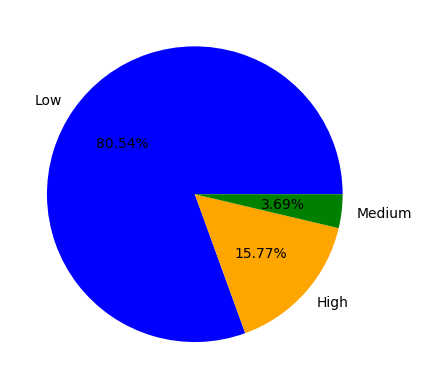

In [10]:
colors=['blue','orange','green','red','yellow']
plt.pie(train_val,labels=train_names,colors=colors,autopct='%1.2f%%')

* From the above pie chart we can see that 80.54% of customer level is Low.
* 15.77% of the customer level is high.
* 3.69% of the cutomer level is medium.  

##READING THE TRANSACTIONDATA OF CUSTOMER
********************************************************************  

In [11]:
transaction_df=pd.read_excel('/content/drive/MyDrive/capstone/transactionsdata_Train.xlsx')
transaction_df.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [12]:
#checking the shape of the data
transaction_df.shape

(104755, 4)

In transaction dataset we have the information about the orderquantity of a customer on a particular date with respective time. In this we have the 104755 records and 4 features
********************************************************************* 

#OBSERVATIONS

After observing the above data ,I got a insight that we have Retention Potential(Target column) records as 23820.So that we have to convert each and every dataset in 23820 records.Then we can finally merge each and every Dataset into a single dataset to make preproceesing and Feature Engeneering  and to build a Model to predict the 'RetentionPotential' of Future Customers 
*********************************************************************

#EmailDATA
First I am concetrating on EmailDataset to Convert the Total Records to 28320 Based on the records and features

In [13]:
email_df

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable
...,...,...,...,...,...,...
517667,C36140,2018-01-18,CustomizedEmail,14:04:44,yes,yes
517668,C36140,2018-01-21,CustomizedEmail,16:17:16,no,no
517669,C36140,2018-01-20,CustomizedEmail,12:17:34,yes,yes
517670,C36140,2018-01-20,CustomizedEmail,16:31:18,yes,no


In [14]:
#Grouping the customers who have received welcome mail but not a customized mail
WelcomeEmail = email_df[(email_df['EmailType'] == 'WelcomeEmail') & ~(email_df['CustomerID'].isin(email_df[email_df['EmailType'] == 'CustomizedEmail']['CustomerID'].unique()))]
WelcomeEmail["CustomerID"].nunique()

9709

In [15]:
#checking the shape of the data
WelcomeEmail.shape

(9709, 6)

In EamilDataset we have only 9709 unique customers who got only WelcomeMail but they don't get customizedMail
*********************************************************************

In [16]:
# combine the 'Date of email' and 'Time' columns into a single datetime column
WelcomeEmail['Email_Date_Time'] = pd.to_datetime(WelcomeEmail['DateOfemail'] +' '+WelcomeEmail['timestamp'])

<ipython-input-16-824c44408106>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WelcomeEmail['Email_Date_Time'] = pd.to_datetime(WelcomeEmail['DateOfemail'] +' '+WelcomeEmail['timestamp'])


In [17]:
WelcomeEmail

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2010-10-03 17:12:24
15,C29837,2011-02-22,WelcomeEmail,16:30:28,yes,NotApplicable,2011-02-22 16:30:28
18,C13691,2011-03-10,WelcomeEmail,12:38:08,yes,NotApplicable,2011-03-10 12:38:08
25,C14905,2009-04-24,WelcomeEmail,10:38:10,yes,NotApplicable,2009-04-24 10:38:10
30,C22750,2011-01-04,WelcomeEmail,12:26:48,yes,NotApplicable,2011-01-04 12:26:48
...,...,...,...,...,...,...,...
23814,C23706,2018-01-17,WelcomeEmail,14:35:14,yes,NotApplicable,2018-01-17 14:35:14
23815,C23511,2018-01-17,WelcomeEmail,14:09:30,yes,NotApplicable,2018-01-17 14:09:30
23816,C12197,2018-01-17,WelcomeEmail,15:45:26,yes,NotApplicable,2018-01-17 15:45:26
23817,C40967,2018-01-17,WelcomeEmail,15:17:08,yes,NotApplicable,2018-01-17 15:17:08


In [18]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
welcome_uq = WelcomeEmail.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of emails
    'Email_Date_Time': ['max','min']# Last email date,first email date
    
})
# Rename the columns to be more descriptive
welcome_uq.columns = ['Total_Emails','Last_Email_Date','First_Email_Date']
welcome_uq = welcome_uq.reset_index(drop=False)

In [19]:
# merge the grouped DataFrame back with the main DataFrame
welcomemail = pd.merge(WelcomeEmail, welcome_uq, on=['CustomerID'],how="inner")

##FINAL WELCOMEMAIL

In [20]:
welcomemail.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time,Total_Emails,Last_Email_Date,First_Email_Date
0,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2010-10-03 17:12:24,1,2010-10-03 17:12:24,2010-10-03 17:12:24
1,C29837,2011-02-22,WelcomeEmail,16:30:28,yes,NotApplicable,2011-02-22 16:30:28,1,2011-02-22 16:30:28,2011-02-22 16:30:28
2,C13691,2011-03-10,WelcomeEmail,12:38:08,yes,NotApplicable,2011-03-10 12:38:08,1,2011-03-10 12:38:08,2011-03-10 12:38:08
3,C14905,2009-04-24,WelcomeEmail,10:38:10,yes,NotApplicable,2009-04-24 10:38:10,1,2009-04-24 10:38:10,2009-04-24 10:38:10
4,C22750,2011-01-04,WelcomeEmail,12:26:48,yes,NotApplicable,2011-01-04 12:26:48,1,2011-01-04 12:26:48,2011-01-04 12:26:48


In [21]:
#Checking the all possible categories based on Mailopened & Mailchecked
email_df.groupby(['EmailType',])['MailOpened','MailClicked'].value_counts()

<ipython-input-21-523873d62b68>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  email_df.groupby(['EmailType',])['MailOpened','MailClicked'].value_counts()


EmailType        MailOpened  MailClicked  
CustomizedEmail  no          no               369483
                 yes         no                96528
                             yes               27512
                 no          yes                 329
WelcomeEmail     yes         NotApplicable     23820
dtype: int64

In [22]:
#Checking the all possible categories based on Mailopened & Mailchecked
mail_names=email_df.groupby(['EmailType',])['MailOpened','MailClicked'].value_counts().index

<ipython-input-22-6f8033525596>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mail_names=email_df.groupby(['EmailType',])['MailOpened','MailClicked'].value_counts().index


In [23]:
#Checking the all possible categories based on Mailopened & Mailchecked
mail_val=email_df.groupby(['EmailType',])['MailOpened','MailClicked'].value_counts().values

<ipython-input-23-5356f153e965>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mail_val=email_df.groupby(['EmailType',])['MailOpened','MailClicked'].value_counts().values


([<matplotlib.patches.Wedge at 0x7fc5f1f122b0>,
 [Text(-0.6843622027939544, 0.8611900924807522, "('CustomizedEmail', 'no', 'no')"),
  Text(0.3854087989278539, -1.0302718368027874, "('CustomizedEmail', 'yes', 'no')"),
  Text(0.9856246671516883, -0.4884096799840517, "('CustomizedEmail', 'yes', 'yes')"),
  Text(1.053718705299074, -0.31571647106675266, "('CustomizedEmail', 'no', 'yes')"),
  Text(1.0885269006190796, -0.15845878526803336, "('WelcomeEmail', 'yes', 'NotApplicable')")],
 [Text(-0.37328847425124784, 0.4697400504440466, '71.37%'),
  Text(0.21022298123337482, -0.561966456437884, '18.65%'),
  Text(0.5376134548100118, -0.2664052799913009, '5.31%'),
  Text(0.5747556574358584, -0.17220898421822872, '0.06%'),
  Text(0.5937419457922252, -0.08643206469165456, '4.60%')])

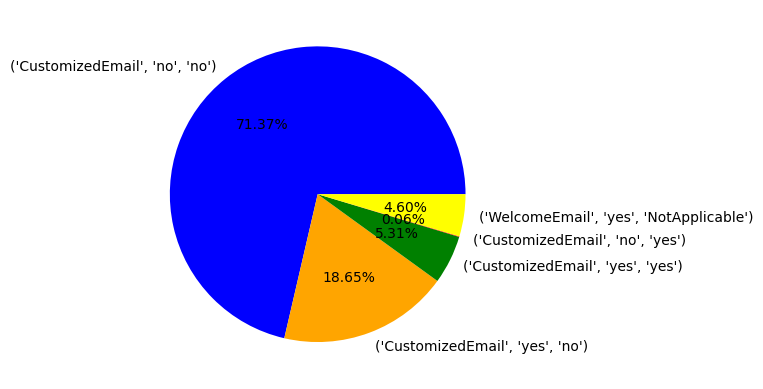

In [24]:
colors=['blue','orange','green','red','yellow']
plt.pie(mail_val,labels=mail_names,colors=colors,autopct='%1.2f%%')

EmailData Observations:

1.   71.37% Customizedmails are not opened but also  not clicked.   
2.   18.65% Customizedmails are opened the mail but not clicked the mail link.
3.   5.31% customized are not only opened but also clicked by the customer. 
4.   0.06% mails are not opened but clicked by the customers. 

5.   4.60% mails are Welcomemails that are opened by the customers but  Notapplicable. 
*********************************************************************
Conclusion:
     CustomizedEmails that have been sent by the retail company is not that much affective to attract the customer to make orders. 








In [25]:
#Separating CustomizedEmail as a Dataset
CustomizedEmail = email_df[email_df['EmailType'] =='CustomizedEmail']
CustomizedEmail

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
23820,C16368,2013-05-20,CustomizedEmail,15:10:30,yes,no
23821,C16368,2013-02-05,CustomizedEmail,13:54:22,yes,no
23822,C16368,2012-11-26,CustomizedEmail,11:22:32,yes,no
23823,C16368,2013-05-30,CustomizedEmail,14:04:42,yes,no
23824,C16368,2013-05-18,CustomizedEmail,10:18:16,yes,no
...,...,...,...,...,...,...
517667,C36140,2018-01-18,CustomizedEmail,14:04:44,yes,yes
517668,C36140,2018-01-21,CustomizedEmail,16:17:16,no,no
517669,C36140,2018-01-20,CustomizedEmail,12:17:34,yes,yes
517670,C36140,2018-01-20,CustomizedEmail,16:31:18,yes,no


In [26]:
#Checking weather Customers who got Customizedmails 14111 or not
CustomizedEmail.CustomerID.value_counts()

C41705    291
C21838    226
C21289    123
C21953    101
C20345     95
         ... 
C36666      1
C25771      1
C27274      1
C16760      1
C21450      1
Name: CustomerID, Length: 14111, dtype: int64

In [27]:
# combine the 'Date of email' and 'Time' columns into a single datetime column
CustomizedEmail['Email_Date_Time'] = pd.to_datetime(CustomizedEmail['DateOfemail'] +' '+CustomizedEmail['timestamp'])

<ipython-input-27-a299bd18fed5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomizedEmail['Email_Date_Time'] = pd.to_datetime(CustomizedEmail['DateOfemail'] +' '+CustomizedEmail['timestamp'])


##Customizedmail  is not opened and not clicked  

In [28]:
#Sampledata of CustomizedEmail is not opened and aslo not clicked
CustomizedEmail_1 = CustomizedEmail[(CustomizedEmail['MailOpened'] =='no') & (CustomizedEmail['MailClicked'] == 'no')]
CustomizedEmail_1

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time
23856,C20345,2013-12-12,CustomizedEmail,14:42:36,no,no,2013-12-12 14:42:36
23862,C20345,2011-12-30,CustomizedEmail,11:22:50,no,no,2011-12-30 11:22:50
23865,C20345,2013-01-23,CustomizedEmail,11:35:14,no,no,2013-01-23 11:35:14
23895,C20345,2011-09-16,CustomizedEmail,14:21:14,no,no,2011-09-16 14:21:14
23925,C20345,2013-01-01,CustomizedEmail,12:50:10,no,no,2013-01-01 12:50:10
...,...,...,...,...,...,...,...
517658,C15522,2018-01-16,CustomizedEmail,12:41:52,no,no,2018-01-16 12:41:52
517662,C15522,2018-01-16,CustomizedEmail,15:14:16,no,no,2018-01-16 15:14:16
517663,C15522,2018-01-16,CustomizedEmail,17:35:40,no,no,2018-01-16 17:35:40
517665,C36140,2018-01-21,CustomizedEmail,11:30:22,no,no,2018-01-21 11:30:22


In [29]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
cust_nn = CustomizedEmail_1.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of emails
    'Email_Date_Time': ['max','min'], # Last email date,first email date
})
# Rename the columns to be more descriptive

cust_nn.columns = ['numofemails','Last_Email_Date','First_Email_Date']
cust_nn = cust_nn.reset_index(drop=False)

In [30]:
cust_nn.head()

,CustomerID,numofemails,Last_Email_Date,First_Email_Date
0,C12116,27,2013-10-09 11:49:08,2013-09-24 11:48:56
1,C12119,28,2013-10-21 10:24:24,2013-04-22 17:13:42
2,C12122,45,2013-04-09 10:21:20,2012-11-13 10:29:56
3,C12123,22,2014-01-10 13:59:24,2013-11-16 16:01:48
4,C12124,28,2013-11-06 17:45:54,2013-10-31 13:22:32


##Customizedmail  is opened but not clicked  

In [31]:
#Sampledata of CustomizedEmail is opened but not clicked
CustomizedEmail2 = CustomizedEmail[(CustomizedEmail['MailOpened'] =='yes') & (CustomizedEmail['MailClicked'] == 'no')]
CustomizedEmail2

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time
23820,C16368,2013-05-20,CustomizedEmail,15:10:30,yes,no,2013-05-20 15:10:30
23821,C16368,2013-02-05,CustomizedEmail,13:54:22,yes,no,2013-02-05 13:54:22
23822,C16368,2012-11-26,CustomizedEmail,11:22:32,yes,no,2012-11-26 11:22:32
23823,C16368,2013-05-30,CustomizedEmail,14:04:42,yes,no,2013-05-30 14:04:42
23824,C16368,2013-05-18,CustomizedEmail,10:18:16,yes,no,2013-05-18 10:18:16
...,...,...,...,...,...,...,...
517659,C15522,2018-01-16,CustomizedEmail,17:11:02,yes,no,2018-01-16 17:11:02
517661,C15522,2018-01-16,CustomizedEmail,15:05:42,yes,no,2018-01-16 15:05:42
517664,C36140,2018-01-18,CustomizedEmail,10:56:54,yes,no,2018-01-18 10:56:54
517666,C36140,2018-01-21,CustomizedEmail,10:25:52,yes,no,2018-01-21 10:25:52


In [32]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
cust_yn = CustomizedEmail2.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of emails
    'Email_Date_Time': ['max','min'], # Last email date,first email date
})
# Rename the columns to be more descriptive
cust_yn.columns = ['numofemails','Last_Email_Date','First_Email_Date']
cust_yn = cust_yn.reset_index(drop=False)

In [33]:
cust_yn

,CustomerID,numofemails,Last_Email_Date,First_Email_Date
0,C12116,2,2013-10-01 17:50:06,2013-09-24 14:06:48
1,C12119,9,2013-09-02 17:02:16,2013-05-09 13:34:48
2,C12123,1,2013-12-07 13:54:42,2013-12-07 13:54:42
3,C12124,4,2013-11-06 11:23:46,2013-11-02 11:01:22
4,C12125,1,2013-03-21 14:20:16,2013-03-21 14:20:16
...,...,...,...,...
11751,C42181,2,2013-10-29 11:53:36,2012-08-08 11:08:02
11752,C42182,1,2012-11-15 11:11:34,2012-11-15 11:11:34
11753,C42183,1,2017-08-12 13:35:24,2017-08-12 13:35:24
11754,C42185,9,2011-10-17 16:26:34,2011-03-05 11:01:04


##Customizedmail  is not opened but clicked  

In [34]:
#Sampledata of CustomizedEmail is not opened but clicked
CustomizedEmail3 = CustomizedEmail[(CustomizedEmail['MailOpened'] =='no') & (CustomizedEmail['MailClicked'] == 'yes')]
CustomizedEmail3

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time
24963,C38742,2010-11-08,CustomizedEmail,15:48:52,no,yes,2010-11-08 15:48:52
26542,C13978,2010-09-20,CustomizedEmail,17:20:34,no,yes,2010-09-20 17:20:34
35154,C35477,2013-04-17,CustomizedEmail,17:53:44,no,yes,2013-04-17 17:53:44
39100,C40364,2013-07-28,CustomizedEmail,17:01:36,no,yes,2013-07-28 17:01:36
40099,C32024,2013-02-08,CustomizedEmail,15:21:22,no,yes,2013-02-08 15:21:22
...,...,...,...,...,...,...,...
515816,C24615,2017-12-16,CustomizedEmail,14:09:24,no,yes,2017-12-16 14:09:24
516026,C12158,2017-12-22,CustomizedEmail,14:47:34,no,yes,2017-12-22 14:47:34
517220,C29861,2016-03-17,CustomizedEmail,15:16:58,no,yes,2016-03-17 15:16:58
517284,C30031,2017-12-19,CustomizedEmail,10:05:22,no,yes,2017-12-19 10:05:22


In [35]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
cust_ny = CustomizedEmail3.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of emails
    'Email_Date_Time': ['max','min'], # Last email date,first email date
})
# Rename the columns to be more descriptive
cust_ny.columns = ['numofemails','Last_Email_Date','First_Email_Date']
cust_ny = cust_ny.reset_index(drop=False)

In [36]:
cust_ny

,CustomerID,numofemails,Last_Email_Date,First_Email_Date
0,C12158,1,2017-12-22 14:47:34,2017-12-22 14:47:34
1,C12224,1,2013-08-09 10:30:18,2013-08-09 10:30:18
2,C12243,1,2013-05-14 15:52:48,2013-05-14 15:52:48
3,C12268,1,2011-06-06 15:55:10,2011-06-06 15:55:10
4,C12273,1,2017-10-09 14:02:42,2017-10-09 14:02:42
...,...,...,...,...
324,C41744,1,2017-09-26 12:20:00,2017-09-26 12:20:00
325,C42040,1,2012-12-02 15:55:04,2012-12-02 15:55:04
326,C42075,1,2013-08-14 13:44:34,2013-08-14 13:44:34
327,C42107,1,2010-04-17 16:12:44,2010-04-17 16:12:44


##Customizedmail  is opened and also clicked  

In [37]:
#Sampledata of CustomizedEmail is opened and also clicked
CustomizedEmail4 =  CustomizedEmail[(CustomizedEmail['MailOpened'] == 'yes') & (CustomizedEmail['MailClicked'] == 'yes')]
CustomizedEmail4

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time
23829,C16368,2013-04-07,CustomizedEmail,13:35:30,yes,yes,2013-04-07 13:35:30
23849,C20345,2013-08-16,CustomizedEmail,13:54:56,yes,yes,2013-08-16 13:54:56
23863,C20345,2013-02-18,CustomizedEmail,16:04:50,yes,yes,2013-02-18 16:04:50
23867,C20345,2011-05-16,CustomizedEmail,10:49:32,yes,yes,2011-05-16 10:49:32
23886,C20345,2012-11-08,CustomizedEmail,12:14:40,yes,yes,2012-11-08 12:14:40
...,...,...,...,...,...,...,...
517656,C37750,2018-01-11,CustomizedEmail,10:06:28,yes,yes,2018-01-11 10:06:28
517660,C15522,2018-01-16,CustomizedEmail,12:09:52,yes,yes,2018-01-16 12:09:52
517667,C36140,2018-01-18,CustomizedEmail,14:04:44,yes,yes,2018-01-18 14:04:44
517669,C36140,2018-01-20,CustomizedEmail,12:17:34,yes,yes,2018-01-20 12:17:34


In [38]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
cust_yy = CustomizedEmail4.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of emails
    'Email_Date_Time': ['max','min'], # Last DateOfemail,first DateOfemail
})
# Rename the columns to be more descriptive
cust_yy.columns = ['numofemails','Last_Email_Date','First_Email_Date']
cust_yy = cust_yy.reset_index(drop=False)

In [39]:
cust_yy

,CustomerID,numofemails,Last_Email_Date,First_Email_Date
0,C12116,2,2013-10-01 14:01:50,2013-09-30 10:15:04
1,C12119,4,2013-10-12 14:59:12,2013-04-28 12:21:08
2,C12123,5,2013-12-17 13:50:30,2013-11-22 12:27:24
3,C12129,1,2013-10-05 13:40:26,2013-10-05 13:40:26
4,C12130,1,2017-07-30 16:24:32,2017-07-30 16:24:32
...,...,...,...,...
8302,C42176,10,2013-06-19 11:38:18,2013-04-22 12:41:48
8303,C42177,2,2013-06-27 17:59:42,2013-05-17 17:20:38
8304,C42181,1,2012-09-29 16:40:04,2012-09-29 16:40:04
8305,C42182,1,2013-08-25 15:37:42,2013-08-25 15:37:42


##Concating the Filtered Four Datasets into one Dataset

In [40]:
CustomizedEmail_concat = pd.concat([cust_nn, cust_yn, cust_ny, cust_yy])
CustomizedEmail_concat

,CustomerID,numofemails,Last_Email_Date,First_Email_Date
0,C12116,27,2013-10-09 11:49:08,2013-09-24 11:48:56
1,C12119,28,2013-10-21 10:24:24,2013-04-22 17:13:42
2,C12122,45,2013-04-09 10:21:20,2012-11-13 10:29:56
3,C12123,22,2014-01-10 13:59:24,2013-11-16 16:01:48
4,C12124,28,2013-11-06 17:45:54,2013-10-31 13:22:32
...,...,...,...,...
8302,C42176,10,2013-06-19 11:38:18,2013-04-22 12:41:48
8303,C42177,2,2013-06-27 17:59:42,2013-05-17 17:20:38
8304,C42181,1,2012-09-29 16:40:04,2012-09-29 16:40:04
8305,C42182,1,2013-08-25 15:37:42,2013-08-25 15:37:42


In [41]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
CustomizedEmail1 = CustomizedEmail_concat.groupby('CustomerID').agg({
    'First_Email_Date': ['min'],#First email date
    'Last_Email_Date': ['max'], # Last email date
    'numofemails' : 'sum', # TotalEMails
})
# Rename the columns to be more descriptive
CustomizedEmail1.columns = ['First_Email_Date','Last_Email_Date','Total_Emails']
CustomizedEmail1 = CustomizedEmail1.reset_index(drop=False)

In [42]:
CustomizedEmail1

,CustomerID,First_Email_Date,Last_Email_Date,Total_Emails
0,C12116,2013-09-24 11:48:56,2013-10-09 11:49:08,31
1,C12119,2013-04-22 17:13:42,2013-10-21 10:24:24,41
2,C12122,2012-11-13 10:29:56,2013-04-09 10:21:20,45
3,C12123,2013-11-16 16:01:48,2014-01-10 13:59:24,28
4,C12124,2013-10-31 13:22:32,2013-11-06 17:45:54,32
...,...,...,...,...
14106,C42181,2011-08-14 10:06:08,2013-10-29 11:53:36,47
14107,C42182,2012-08-31 10:32:00,2013-11-28 17:51:08,49
14108,C42183,2017-08-07 11:18:38,2017-08-13 17:43:26,41
14109,C42185,2011-03-05 11:01:04,2011-12-30 13:52:52,43


In [43]:
CustomizedEmail1['DateOfemail'] = CustomizedEmail1['Last_Email_Date'].dt.date.astype(str)
CustomizedEmail1['timestamp'] = CustomizedEmail1['Last_Email_Date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))

In [44]:
CustomizedEmail1

,CustomerID,First_Email_Date,Last_Email_Date,Total_Emails,DateOfemail,timestamp
0,C12116,2013-09-24 11:48:56,2013-10-09 11:49:08,31,2013-10-09,11:49:08
1,C12119,2013-04-22 17:13:42,2013-10-21 10:24:24,41,2013-10-21,10:24:24
2,C12122,2012-11-13 10:29:56,2013-04-09 10:21:20,45,2013-04-09,10:21:20
3,C12123,2013-11-16 16:01:48,2014-01-10 13:59:24,28,2014-01-10,13:59:24
4,C12124,2013-10-31 13:22:32,2013-11-06 17:45:54,32,2013-11-06,17:45:54
...,...,...,...,...,...,...
14106,C42181,2011-08-14 10:06:08,2013-10-29 11:53:36,47,2013-10-29,11:53:36
14107,C42182,2012-08-31 10:32:00,2013-11-28 17:51:08,49,2013-11-28,17:51:08
14108,C42183,2017-08-07 11:18:38,2017-08-13 17:43:26,41,2017-08-13,17:43:26
14109,C42185,2011-03-05 11:01:04,2011-12-30 13:52:52,43,2011-12-30,13:52:52


In [45]:
# merge the grouped DataFrame back with the main DataFrame
final_cust = pd.merge(CustomizedEmail, CustomizedEmail1, on=['CustomerID','DateOfemail','timestamp'],how="inner")

In [46]:
final_cust

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time,First_Email_Date,Last_Email_Date,Total_Emails
0,C16368,2013-07-25,CustomizedEmail,12:46:04,yes,no,2013-07-25 12:46:04,2012-10-07 17:29:40,2013-07-25 12:46:04,29
1,C20345,2013-12-19,CustomizedEmail,14:28:06,yes,no,2013-12-19 14:28:06,2010-12-21 10:43:32,2013-12-19 14:28:06,95
2,C18647,2012-12-17,CustomizedEmail,11:00:04,yes,no,2012-12-17 11:00:04,2011-02-10 16:19:20,2012-12-17 11:00:04,30
3,C36692,2014-01-16,CustomizedEmail,13:34:52,no,no,2014-01-16 13:34:52,2009-12-24 10:59:42,2014-01-16 13:34:52,64
4,C13831,2013-12-05,CustomizedEmail,11:11:26,yes,no,2013-12-05 11:11:26,2011-03-04 16:43:04,2013-12-05 11:11:26,34
...,...,...,...,...,...,...,...,...,...,...
14106,C23635,2018-01-15,CustomizedEmail,17:59:34,yes,no,2018-01-15 17:59:34,2018-01-15 12:46:20,2018-01-15 17:59:34,6
14107,C30124,2018-01-15,CustomizedEmail,16:39:52,no,no,2018-01-15 16:39:52,2018-01-11 13:59:34,2018-01-15 16:39:52,6
14108,C37750,2018-01-11,CustomizedEmail,10:06:28,yes,yes,2018-01-11 10:06:28,2017-10-20 12:05:18,2018-01-11 10:06:28,6
14109,C15522,2018-01-16,CustomizedEmail,17:35:40,no,no,2018-01-16 17:35:40,2018-01-16 12:09:52,2018-01-16 17:35:40,6


##Final EmailData

In [47]:
#Concating the Welcomemaildata and Customizeddata
Emaildata=pd.concat([welcomemail,final_cust])

In [48]:
Emaildata

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time,Total_Emails,Last_Email_Date,First_Email_Date
0,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2010-10-03 17:12:24,1,2010-10-03 17:12:24,2010-10-03 17:12:24
1,C29837,2011-02-22,WelcomeEmail,16:30:28,yes,NotApplicable,2011-02-22 16:30:28,1,2011-02-22 16:30:28,2011-02-22 16:30:28
2,C13691,2011-03-10,WelcomeEmail,12:38:08,yes,NotApplicable,2011-03-10 12:38:08,1,2011-03-10 12:38:08,2011-03-10 12:38:08
3,C14905,2009-04-24,WelcomeEmail,10:38:10,yes,NotApplicable,2009-04-24 10:38:10,1,2009-04-24 10:38:10,2009-04-24 10:38:10
4,C22750,2011-01-04,WelcomeEmail,12:26:48,yes,NotApplicable,2011-01-04 12:26:48,1,2011-01-04 12:26:48,2011-01-04 12:26:48
...,...,...,...,...,...,...,...,...,...,...
14106,C23635,2018-01-15,CustomizedEmail,17:59:34,yes,no,2018-01-15 17:59:34,6,2018-01-15 17:59:34,2018-01-15 12:46:20
14107,C30124,2018-01-15,CustomizedEmail,16:39:52,no,no,2018-01-15 16:39:52,6,2018-01-15 16:39:52,2018-01-11 13:59:34
14108,C37750,2018-01-11,CustomizedEmail,10:06:28,yes,yes,2018-01-11 10:06:28,6,2018-01-11 10:06:28,2017-10-20 12:05:18
14109,C15522,2018-01-16,CustomizedEmail,17:35:40,no,no,2018-01-16 17:35:40,6,2018-01-16 17:35:40,2018-01-16 12:09:52


#TransactionData
*********************************************************************
Now I am concetrating on TransactionData to Convert the Total Records to 28320 Based on the records and features

In [49]:
transaction_df

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81
...,...,...,...,...
104750,C12197,2018-01-17,14:35:40,56
104751,C40967,2018-01-17,17:15:20,35
104752,C36140,2018-01-17,13:12:54,47
104753,C36140,2018-01-21,21:12:52,53


In [50]:
# combine the 'Dateoforder' and 'Timestamp' columns into a single datetime column
transaction_df['Transaction_Date_Time'] = pd.to_datetime(transaction_df['DateOfOrder'] +' '+transaction_df['timestamp'])

In [51]:
# Group the data by customer ID and calculate the number of transactions, total amount spent, and last transaction date
transaction_uq = transaction_df.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of transactions
    'OrderQuantity': 'sum', # Total orders
    'Transaction_Date_Time': ['min', 'max'],# Last transaction date
})
# Rename the columns to be more descriptive
transaction_uq.columns = ['Num_Transactions','Totalorders','First_Transaction_Date','Last_Transaction_Date',]
transaction_uq = transaction_uq.reset_index(drop=False)

In [52]:
transaction_uq['DateOfOrder'] = transaction_uq['Last_Transaction_Date'].dt.date.astype(str)
transaction_uq['timestamp'] = transaction_uq['Last_Transaction_Date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))

In [53]:
# merge the grouped DataFrame back with the main DataFrame
final_transaction = pd.merge(transaction_df, transaction_uq, on=['CustomerID','DateOfOrder','timestamp'],how="inner")
final_transaction

,CustomerID,DateOfOrder,timestamp,OrderQuantity,Transaction_Date_Time,Num_Transactions,Totalorders,First_Transaction_Date,Last_Transaction_Date
0,C16368,2013-08-11,15:17:52,15,2013-08-11 15:17:52,1,15,2013-08-11 15:17:52,2013-08-11 15:17:52
1,C20345,2014-01-19,18:11:30,84,2014-01-19 18:11:30,186,15614,2011-04-01 19:50:00,2014-01-19 18:11:30
2,C17683,2011-07-06,18:12:10,34,2011-07-06 18:12:10,13,443,2010-12-01 11:38:20,2011-07-06 18:12:10
3,C18647,2013-01-28,17:04:46,111,2013-01-28 17:04:46,7,748,2010-11-29 15:23:52,2013-01-28 17:04:46
4,C36692,2014-01-16,11:21:46,69,2014-01-16 11:21:46,34,2350,2011-09-21 19:54:50,2014-01-16 11:21:46
...,...,...,...,...,...,...,...,...,...
23815,C23511,2018-01-17,10:37:10,41,2018-01-17 10:37:10,1,41,2018-01-17 10:37:10,2018-01-17 10:37:10
23816,C12197,2018-01-17,14:35:40,56,2018-01-17 14:35:40,1,56,2018-01-17 14:35:40,2018-01-17 14:35:40
23817,C40967,2018-01-17,17:15:20,35,2018-01-17 17:15:20,1,35,2018-01-17 17:15:20,2018-01-17 17:15:20
23818,C36140,2018-01-21,21:12:52,53,2018-01-21 21:12:52,2,100,2018-01-17 13:12:54,2018-01-21 21:12:52


##Final Transformed Transaction Dataset
*********************************************************************
Here I am droping OrderQuantity , DateOfOrder , timestamp and Transaction_Date_Time because, 

> OrderQuantity : Here I am droping OrderQuantity because it belongs to a perticular day and time as we combined no.of orders into single order by using group function.

> DateOfOrder: Droping DateOfOrder column it is similar as Last_Transaction_Date 

> timestamp :  Droping timestamp column it is similar as Last_Transaction_Date timestamp.

> Transaction_Date_Time : Droping Transaction_Date_Time column it is similar as Last_Transaction_Date










In [54]:
transactiondata=final_transaction.drop(['OrderQuantity','DateOfOrder','timestamp','Transaction_Date_Time'],axis=1)

In [55]:
transactiondata

,CustomerID,Num_Transactions,Totalorders,First_Transaction_Date,Last_Transaction_Date
0,C16368,1,15,2013-08-11 15:17:52,2013-08-11 15:17:52
1,C20345,186,15614,2011-04-01 19:50:00,2014-01-19 18:11:30
2,C17683,13,443,2010-12-01 11:38:20,2011-07-06 18:12:10
3,C18647,7,748,2010-11-29 15:23:52,2013-01-28 17:04:46
4,C36692,34,2350,2011-09-21 19:54:50,2014-01-16 11:21:46
...,...,...,...,...,...
23815,C23511,1,41,2018-01-17 10:37:10,2018-01-17 10:37:10
23816,C12197,1,56,2018-01-17 14:35:40,2018-01-17 14:35:40
23817,C40967,1,35,2018-01-17 17:15:20,2018-01-17 17:15:20
23818,C36140,2,100,2018-01-17 13:12:54,2018-01-21 21:12:52


*********************************************************************

we hvae converted every Dataset into same Record size.So we can merge them by CustomerID to get Final Dataset without any null values. 
*********************************************************************

#FinalDataset
*********************************************************************
Merging Four DAtasets to one Final Dataset  

In [56]:

# merge the datasets on a common column
train_data = pd.merge(cust_df, transactiondata, on="CustomerID",how ='inner')
train_data = pd.merge(train_data, Emaildata, on="CustomerID",how ='inner')
train_data = pd.merge(train_data, train_df, on="CustomerID",how ='inner')

In [57]:
train_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Num_Transactions,Totalorders,First_Transaction_Date,...,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time,Total_Emails,Last_Email_Date,First_Email_Date,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,1,15,2013-08-11 15:17:52,...,2013-07-25,CustomizedEmail,12:46:04,yes,no,2013-07-25 12:46:04,29,2013-07-25 12:46:04,2012-10-07 17:29:40,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,186,15614,2011-04-01 19:50:00,...,2013-12-19,CustomizedEmail,14:28:06,yes,no,2013-12-19 14:28:06,95,2013-12-19 14:28:06,2010-12-21 10:43:32,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,13,443,2010-12-01 11:38:20,...,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2010-10-03 17:12:24,1,2010-10-03 17:12:24,2010-10-03 17:12:24,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,7,748,2010-11-29 15:23:52,...,2012-12-17,CustomizedEmail,11:00:04,yes,no,2012-12-17 11:00:04,30,2012-12-17 11:00:04,2011-02-10 16:19:20,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,34,2350,2011-09-21 19:54:50,...,2014-01-16,CustomizedEmail,13:34:52,no,no,2014-01-16 13:34:52,64,2014-01-16 13:34:52,2009-12-24 10:59:42,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday,1,41,2018-01-17 10:37:10,...,2018-01-17,WelcomeEmail,14:09:30,yes,NotApplicable,2018-01-17 14:09:30,1,2018-01-17 14:09:30,2018-01-17 14:09:30,Low
23816,C12197,CITY3,2018-01-17,1,0,1,Friday,1,56,2018-01-17 14:35:40,...,2018-01-17,WelcomeEmail,15:45:26,yes,NotApplicable,2018-01-17 15:45:26,1,2018-01-17 15:45:26,2018-01-17 15:45:26,Low
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday,1,35,2018-01-17 17:15:20,...,2018-01-17,WelcomeEmail,15:17:08,yes,NotApplicable,2018-01-17 15:17:08,1,2018-01-17 15:17:08,2018-01-17 15:17:08,Low
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday,2,100,2018-01-17 13:12:54,...,2018-01-21,CustomizedEmail,16:17:16,no,no,2018-01-21 16:17:16,8,2018-01-21 16:17:16,2018-01-18 10:56:54,Low


Here I droped Email_Data_Time,DateOfemail and timestamp because they are same as Last_Email_Date and timestamp

In [58]:
#Droping Email_Date_Time & timestamp
train_data=train_data.drop(['Email_Date_Time','timestamp','DateOfemail'],axis=1)

In [59]:
#to check the no of records and columns
train_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Num_Transactions,Totalorders,First_Transaction_Date,Last_Transaction_Date,EmailType,MailOpened,MailClicked,Total_Emails,Last_Email_Date,First_Email_Date,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,1,15,2013-08-11 15:17:52,2013-08-11 15:17:52,CustomizedEmail,yes,no,29,2013-07-25 12:46:04,2012-10-07 17:29:40,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,186,15614,2011-04-01 19:50:00,2014-01-19 18:11:30,CustomizedEmail,yes,no,95,2013-12-19 14:28:06,2010-12-21 10:43:32,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,13,443,2010-12-01 11:38:20,2011-07-06 18:12:10,WelcomeEmail,yes,NotApplicable,1,2010-10-03 17:12:24,2010-10-03 17:12:24,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,7,748,2010-11-29 15:23:52,2013-01-28 17:04:46,CustomizedEmail,yes,no,30,2012-12-17 11:00:04,2011-02-10 16:19:20,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,34,2350,2011-09-21 19:54:50,2014-01-16 11:21:46,CustomizedEmail,no,no,64,2014-01-16 13:34:52,2009-12-24 10:59:42,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday,1,41,2018-01-17 10:37:10,2018-01-17 10:37:10,WelcomeEmail,yes,NotApplicable,1,2018-01-17 14:09:30,2018-01-17 14:09:30,Low
23816,C12197,CITY3,2018-01-17,1,0,1,Friday,1,56,2018-01-17 14:35:40,2018-01-17 14:35:40,WelcomeEmail,yes,NotApplicable,1,2018-01-17 15:45:26,2018-01-17 15:45:26,Low
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday,1,35,2018-01-17 17:15:20,2018-01-17 17:15:20,WelcomeEmail,yes,NotApplicable,1,2018-01-17 15:17:08,2018-01-17 15:17:08,Low
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday,2,100,2018-01-17 13:12:54,2018-01-21 21:12:52,CustomizedEmail,no,no,8,2018-01-21 16:17:16,2018-01-18 10:56:54,Low


In [60]:
#checking the all column names
train_data.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'Num_Transactions', 'Totalorders', 'First_Transaction_Date',
       'Last_Transaction_Date', 'EmailType', 'MailOpened', 'MailClicked',
       'Total_Emails', 'Last_Email_Date', 'First_Email_Date',
       'RetentionPotential'],
      dtype='object')

In [61]:
#checking each column type
train_data.dtypes

CustomerID                        object
City                              object
DateOfRegistration        datetime64[ns]
OnlineCommunication                int64
AutomaticRefill                    int64
DoorstepDelivery                   int64
PreferredDeliveryDay              object
Num_Transactions                   int64
Totalorders                        int64
First_Transaction_Date    datetime64[ns]
Last_Transaction_Date     datetime64[ns]
EmailType                         object
MailOpened                        object
MailClicked                       object
Total_Emails                       int64
Last_Email_Date           datetime64[ns]
First_Email_Date          datetime64[ns]
RetentionPotential                object
dtype: object

##Visualization

In [62]:
# convert the date columns to datetime objects
train_data['DateOfRegistration'] = pd.to_datetime(train_data['DateOfRegistration'])
train_data['Last_Transaction_Date'] = pd.to_datetime(train_data['Last_Transaction_Date'])

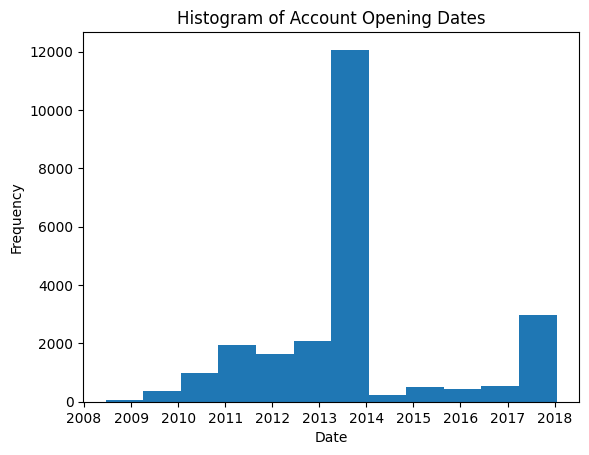

In [63]:
# create a histogram of the account opening dates
plt.hist(train_data['DateOfRegistration'], bins=12)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Account Opening Dates')
plt.show()

******************************************************************* 
* From above histogram we can see that the registraions are slightly increasing from 2010 to 2013 and it suddenly increased exponentially from 2013 to 2014.

* And again it decreased to the ground till 2017 .


* From 2017 to 2018 it increased sligtly. 
*******************************************************************  

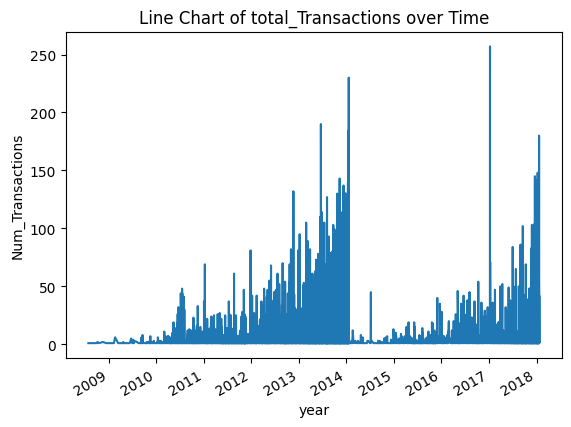

In [64]:
# create a line chart of the loan amounts over time
train_data.set_index('Last_Transaction_Date', inplace=True)
train_data['Num_Transactions'].plot()
plt.xlabel('year')
plt.ylabel('Num_Transactions')
plt.title('Line Chart of total_Transactions over Time')
plt.show()
train_data = train_data.reset_index(drop=False)

*******************************************************************
* From the above linechart we can observe the trend of the number of trancation done by the customer till the 2018.
* From the above linechart we can see that number of trasactions are increasing from 2011 to 2013 .
* And it increased exponentially 2013 to 2014.And suddenly decreased in 2015 to 2016.
* In 2017 number of trasaction is increasing and decreasing till 2018.
*******************************************************************       

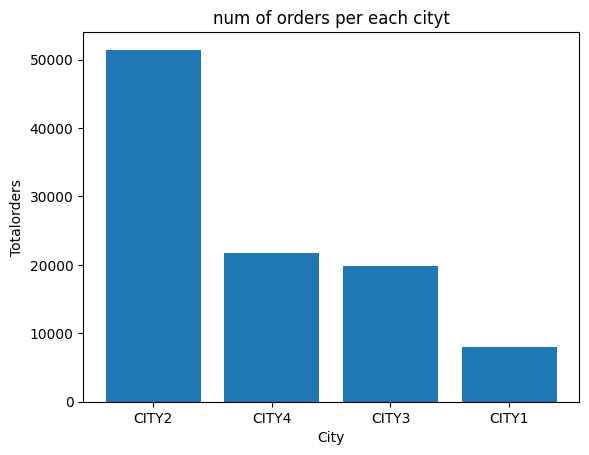

In [65]:
# create a bar plot
plt.bar(train_data['City'], train_data['Totalorders'])
plt.xlabel('City')
plt.ylabel('Totalorders')
plt.title('num of orders per each cityt')
plt.show()


* From above bar graph we can see that City2 have more number of orders then others cities.
* City4 and City3 are slightly similar .
* City1 has done less number of orders then any other cities    

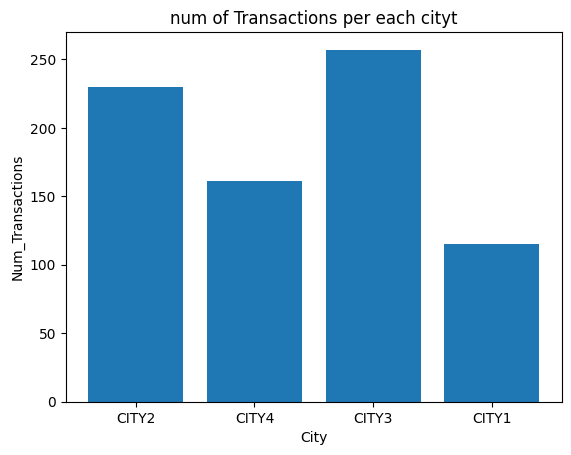

In [66]:
# create a bar plot
plt.bar(train_data['City'], train_data['Num_Transactions'])
plt.xlabel('City')
plt.ylabel('Num_Transactions')
plt.title('num of Transactions per each cityt')
plt.show()



* From above bar graph we can see that City3 have more number of trasactions then others cities.
* City2 and City3 are slightly similar .
* City1 has done less number of transactions then any other cities    

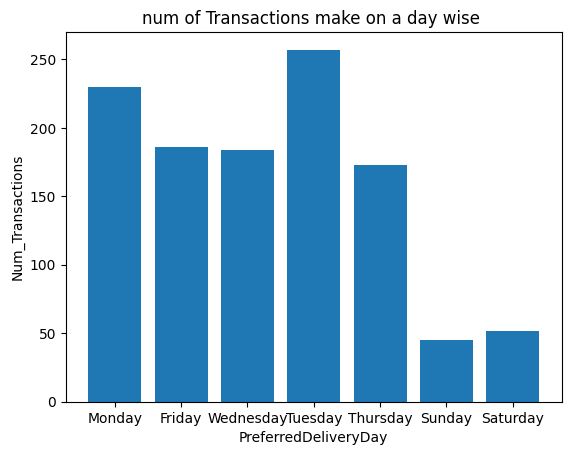

In [67]:
# create a bar plot
plt.bar(train_data['PreferredDeliveryDay'], train_data['Num_Transactions'])
plt.xlabel('PreferredDeliveryDay')
plt.ylabel('Num_Transactions')
plt.title('num of Transactions make on a day wise ')
plt.show()



* From above Bar plot we can see that number of transactions made by customer is on Tuesday and Monday.
* Wednesday ,Thursday and Friday the number of transactoion made by customers are equal.
* Transaction done on Sunday and Saturday are very less.

##Converting Every Date columns in Dataset into day, month, year columns
********************************************************************************

In [68]:
train_data["DateOfRegistration"] = pd.to_datetime(train_data["DateOfRegistration"])

# extract day of the week feature
train_data["Registration_day"] = train_data["DateOfRegistration"].dt.dayofweek

# extract month feature
train_data["Registration_month"] = train_data["DateOfRegistration"].dt.month

# extract year feature
train_data["Registration_year"] = train_data["DateOfRegistration"].dt.year

In [69]:
train_data['LastEmail_Date'] = train_data['Last_Email_Date'].dt.date.astype(str)
train_data['LM_timestamp'] = train_data['Last_Email_Date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))
train_data["Last_Email_Date"] = pd.to_datetime(train_data["Last_Email_Date"])

# extract day of the week feature
train_data["LastEmail_day"] = train_data["Last_Email_Date"].dt.dayofweek

# extract month feature
train_data["LastEmail_month"] = train_data["Last_Email_Date"].dt.month

# extract year feature
train_data["LastEmail_year"] = train_data["Last_Email_Date"].dt.year

In [70]:
train_data['FirstEmail_Date'] = train_data['First_Email_Date'].dt.date.astype(str)
train_data['FM_timestamp'] = train_data['First_Email_Date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))
train_data["First_Email_Date"] = pd.to_datetime(train_data["First_Email_Date"])

# extract day of the week feature
train_data["FM_day"] = train_data["First_Email_Date"].dt.dayofweek

# extract month feature
train_data["FM_month"] = train_data["First_Email_Date"].dt.month

# extract year feature
train_data["FM_year"] = train_data["First_Email_Date"].dt.year

In [71]:
train_data['Firsttransaction_Date'] = train_data['First_Transaction_Date'].dt.date.astype(str)
train_data['FT_timestamp'] = train_data['First_Transaction_Date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))
train_data["First_Transaction_Date"] = pd.to_datetime(train_data["First_Transaction_Date"])

# extract day of the week feature
train_data["FT_day"] = train_data["First_Transaction_Date"].dt.dayofweek

# extract month feature
train_data["FT_month"] = train_data["First_Transaction_Date"].dt.month

# extract year feature
train_data["FT_year"] = train_data["First_Transaction_Date"].dt.year

In [72]:
train_data['Lasttransaction_Date'] = train_data['Last_Transaction_Date'].dt.date.astype(str)
train_data['LT_timestamp'] = train_data['Last_Transaction_Date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))
train_data["Last_Transaction_Date"] = pd.to_datetime(train_data["Last_Transaction_Date"])

# extract day of the week feature
train_data["LT_day"] = train_data["Last_Transaction_Date"].dt.dayofweek

# extract month feature
train_data["LT_month"] = train_data["Last_Transaction_Date"].dt.month

# extract year feature
train_data["LT_year"] = train_data["Last_Transaction_Date"].dt.year

In [73]:
train_data.head()

,Last_Transaction_Date,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Num_Transactions,Totalorders,...,Firsttransaction_Date,FT_timestamp,FT_day,FT_month,FT_year,Lasttransaction_Date,LT_timestamp,LT_day,LT_month,LT_year
0,2013-08-11 15:17:52,C16368,CITY2,2012-09-28,0,0,0,Monday,1,15,...,2013-08-11,15:17:52,6,8,2013,2013-08-11,15:17:52,6,8,2013
1,2014-01-19 18:11:30,C20345,CITY2,2010-12-19,1,1,1,Friday,186,15614,...,2011-04-01,19:50:00,4,4,2011,2014-01-19,18:11:30,6,1,2014
2,2011-07-06 18:12:10,C17683,CITY2,2010-10-03,0,0,0,Wednesday,13,443,...,2010-12-01,11:38:20,2,12,2010,2011-07-06,18:12:10,2,7,2011
3,2013-01-28 17:04:46,C18647,CITY4,2010-11-27,0,0,0,Monday,7,748,...,2010-11-29,15:23:52,0,11,2010,2013-01-28,17:04:46,0,1,2013
4,2014-01-16 11:21:46,C36692,CITY2,2009-12-04,1,1,0,Friday,34,2350,...,2011-09-21,19:54:50,2,9,2011,2014-01-16,11:21:46,3,1,2014


In [74]:
#Checking the column names 
train_data.columns

Index(['Last_Transaction_Date', 'CustomerID', 'City', 'DateOfRegistration',
       'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay', 'Num_Transactions', 'Totalorders',
       'First_Transaction_Date', 'EmailType', 'MailOpened', 'MailClicked',
       'Total_Emails', 'Last_Email_Date', 'First_Email_Date',
       'RetentionPotential', 'Registration_day', 'Registration_month',
       'Registration_year', 'LastEmail_Date', 'LM_timestamp', 'LastEmail_day',
       'LastEmail_month', 'LastEmail_year', 'FirstEmail_Date', 'FM_timestamp',
       'FM_day', 'FM_month', 'FM_year', 'Firsttransaction_Date',
       'FT_timestamp', 'FT_day', 'FT_month', 'FT_year', 'Lasttransaction_Date',
       'LT_timestamp', 'LT_day', 'LT_month', 'LT_year'],
      dtype='object')

###Droping Date columns
*********************************************************************
Here I droping the Date columns after separating into individual columns

In [75]:
#Droping date columns 
train=train_data.drop(['Last_Transaction_Date','First_Transaction_Date','First_Email_Date','Last_Email_Date','Lasttransaction_Date','Firsttransaction_Date','FirstEmail_Date','DateOfRegistration','LastEmail_Date','FT_timestamp','FM_timestamp','LM_timestamp','LT_timestamp'],axis=1)

In [76]:
#new dataframe that contain only droped date and time columns
dates_times=train_data.drop(train,axis=1)

In [77]:
train.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Num_Transactions,Totalorders,EmailType,MailOpened,...,LastEmail_year,FM_day,FM_month,FM_year,FT_day,FT_month,FT_year,LT_day,LT_month,LT_year
0,C16368,CITY2,0,0,0,Monday,1,15,CustomizedEmail,yes,...,2013,6,10,2012,6,8,2013,6,8,2013
1,C20345,CITY2,1,1,1,Friday,186,15614,CustomizedEmail,yes,...,2013,1,12,2010,4,4,2011,6,1,2014
2,C17683,CITY2,0,0,0,Wednesday,13,443,WelcomeEmail,yes,...,2010,6,10,2010,2,12,2010,2,7,2011
3,C18647,CITY4,0,0,0,Monday,7,748,CustomizedEmail,yes,...,2012,3,2,2011,0,11,2010,0,1,2013
4,C36692,CITY2,1,1,0,Friday,34,2350,CustomizedEmail,no,...,2014,3,12,2009,2,9,2011,3,1,2014


In [78]:
#checking the column names
train.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'Num_Transactions',
       'Totalorders', 'EmailType', 'MailOpened', 'MailClicked', 'Total_Emails',
       'RetentionPotential', 'Registration_day', 'Registration_month',
       'Registration_year', 'LastEmail_day', 'LastEmail_month',
       'LastEmail_year', 'FM_day', 'FM_month', 'FM_year', 'FT_day', 'FT_month',
       'FT_year', 'LT_day', 'LT_month', 'LT_year'],
      dtype='object')

In [79]:
#Converting the features of a dataset into a list to rearrange the feature names
print('Current feature order:',train.columns.tolist())

Current feature order: ['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay', 'Num_Transactions', 'Totalorders', 'EmailType', 'MailOpened', 'MailClicked', 'Total_Emails', 'RetentionPotential', 'Registration_day', 'Registration_month', 'Registration_year', 'LastEmail_day', 'LastEmail_month', 'LastEmail_year', 'FM_day', 'FM_month', 'FM_year', 'FT_day', 'FT_month', 'FT_year', 'LT_day', 'LT_month', 'LT_year']


In [80]:
#New order of feature columns
new_order=['CustomerID', 'City','Registration_day', 'Registration_month','Registration_year','OnlineCommunication', 'AutomaticRefill','DoorstepDelivery', 'PreferredDeliveryDay','EmailType', 'MailOpened', 'MailClicked', 'Total_Emails','FM_day', 'FM_month', 'FM_year','LastEmail_day', 'LastEmail_month','LastEmail_year', 'FT_day', 'FT_month','FT_year', 'LT_day', 'LT_month', 'LT_year','Num_Transactions','Totalorders','RetentionPotential']

In [81]:
#Assign new order to trainData 
train=train[new_order]

In [82]:
train.head()

,CustomerID,City,Registration_day,Registration_month,Registration_year,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,...,LastEmail_year,FT_day,FT_month,FT_year,LT_day,LT_month,LT_year,Num_Transactions,Totalorders,RetentionPotential
0,C16368,CITY2,4,9,2012,0,0,0,Monday,CustomizedEmail,...,2013,6,8,2013,6,8,2013,1,15,High
1,C20345,CITY2,6,12,2010,1,1,1,Friday,CustomizedEmail,...,2013,4,4,2011,6,1,2014,186,15614,Low
2,C17683,CITY2,6,10,2010,0,0,0,Wednesday,WelcomeEmail,...,2010,2,12,2010,2,7,2011,13,443,Medium
3,C18647,CITY4,5,11,2010,0,0,0,Monday,CustomizedEmail,...,2012,0,11,2010,0,1,2013,7,748,Low
4,C36692,CITY2,4,12,2009,1,1,0,Friday,CustomizedEmail,...,2014,2,9,2011,3,1,2014,34,2350,Low


In [83]:
#Checking the column names  
train.columns

Index(['CustomerID', 'City', 'Registration_day', 'Registration_month',
       'Registration_year', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'EmailType', 'MailOpened',
       'MailClicked', 'Total_Emails', 'FM_day', 'FM_month', 'FM_year',
       'LastEmail_day', 'LastEmail_month', 'LastEmail_year', 'FT_day',
       'FT_month', 'FT_year', 'LT_day', 'LT_month', 'LT_year',
       'Num_Transactions', 'Totalorders', 'RetentionPotential'],
      dtype='object')

In [84]:
#to check the info traindata
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            23820 non-null  object
 1   City                  23820 non-null  object
 2   Registration_day      23820 non-null  int64 
 3   Registration_month    23820 non-null  int64 
 4   Registration_year     23820 non-null  int64 
 5   OnlineCommunication   23820 non-null  int64 
 6   AutomaticRefill       23820 non-null  int64 
 7   DoorstepDelivery      23820 non-null  int64 
 8   PreferredDeliveryDay  23820 non-null  object
 9   EmailType             23820 non-null  object
 10  MailOpened            23820 non-null  object
 11  MailClicked           23820 non-null  object
 12  Total_Emails          23820 non-null  int64 
 13  FM_day                23820 non-null  int64 
 14  FM_month              23820 non-null  int64 
 15  FM_year               23820 non-null

In [85]:
#Describing the train
train.describe()

,Registration_day,Registration_month,Registration_year,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Total_Emails,FM_day,FM_month,FM_year,...,LastEmail_month,LastEmail_year,FT_day,FT_month,FT_year,LT_day,LT_month,LT_year,Num_Transactions,Totalorders
count,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,...,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000
mean,2.804828,7.906843,2013.182032,0.660411,0.094710,0.037615,21.140260,2.876994,7.968304,2013.188959,...,7.893157,2013.485432,2.701092,8.053149,2013.286398,2.721369,7.777498,2013.547565,4.397775,357.622922
std,1.971305,3.219031,1.952012,0.473580,0.292821,0.190268,19.620475,1.968960,3.214102,1.948199,...,3.661418,1.886310,2.035886,3.320836,1.911056,2.070869,3.757717,1.862829,12.142475,1335.649680
min,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2008.000000,...,1.000000,2008.000000,0.000000,1.000000,2008.000000,0.000000,1.000000,2008.000000,1.000000,0.000000
25%,1.000000,6.000000,2012.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000,2012.000000,...,5.000000,2013.000000,1.000000,6.000000,2013.000000,1.000000,5.000000,2013.000000,1.000000,41.000000
50%,3.000000,9.000000,2013.000000,1.000000,0.000000,0.000000,19.000000,3.000000,9.000000,2013.000000,...,9.000000,2013.000000,2.000000,9.000000,2013.000000,2.000000,9.000000,2013.000000,1.000000,65.000000
75%,4.000000,10.000000,2013.000000,1.000000,0.000000,0.000000,40.000000,5.000000,10.000000,2013.000000,...,11.000000,2014.000000,4.000000,11.000000,2013.000000,4.000000,11.000000,2014.000000,3.000000,169.000000
max,6.000000,12.000000,2018.000000,1.000000,1.000000,1.000000,291.000000,6.000000,12.000000,2018.000000,...,12.000000,2018.000000,6.000000,12.000000,2018.000000,6.000000,12.000000,2018.000000,257.000000,51429.000000


In [86]:
#checking wheather the null values are present or not 
train.isnull().sum()

CustomerID              0
City                    0
Registration_day        0
Registration_month      0
Registration_year       0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
EmailType               0
MailOpened              0
MailClicked             0
Total_Emails            0
FM_day                  0
FM_month                0
FM_year                 0
LastEmail_day           0
LastEmail_month         0
LastEmail_year          0
FT_day                  0
FT_month                0
FT_year                 0
LT_day                  0
LT_month                0
LT_year                 0
Num_Transactions        0
Totalorders             0
RetentionPotential      0
dtype: int64

In [87]:
#Checking wheather is there any corelated features present or not
train.corr()

<ipython-input-87-1fa028498075>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Registration_day,Registration_month,Registration_year,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Total_Emails,FM_day,FM_month,FM_year,...,LastEmail_month,LastEmail_year,FT_day,FT_month,FT_year,LT_day,LT_month,LT_year,Num_Transactions,Totalorders
Registration_day,1.000000,-0.016957,0.021922,0.015571,-0.022815,-0.009193,0.044888,0.441314,-0.017761,0.021683,...,-0.004506,0.015601,0.451193,-0.004405,0.017178,0.336259,-0.002230,0.014641,-0.008185,-0.007625
Registration_month,-0.016957,1.000000,0.030868,0.326963,0.080580,0.036979,-0.135585,-0.007101,0.964962,0.033608,...,0.546389,0.027188,0.013041,0.774343,0.039695,0.012380,0.500678,0.021326,-0.110504,-0.097794
Registration_year,0.021922,0.030868,1.000000,0.369337,0.078984,0.054473,-0.073234,-0.007719,0.027747,0.998998,...,0.008595,0.932161,0.076497,0.049543,0.980628,0.076659,0.026367,0.916185,-0.178773,-0.154627
OnlineCommunication,0.015571,0.326963,0.369337,1.000000,0.176233,0.097039,-0.141578,-0.000585,0.323056,0.367286,...,0.182118,0.304713,0.044290,0.297651,0.335884,0.049108,0.174229,0.286167,-0.071282,-0.065848
AutomaticRefill,-0.022815,0.080580,0.078984,0.176233,1.000000,0.185477,0.010563,-0.006881,0.080585,0.079018,...,-0.060577,0.101841,-0.000328,0.060664,0.080117,0.013334,-0.078906,0.099417,0.073452,0.050431
DoorstepDelivery,-0.009193,0.036979,0.054473,0.097039,0.185477,1.000000,0.053006,0.001929,0.038953,0.054330,...,-0.105057,0.083527,0.007026,0.019759,0.056390,0.029158,-0.126285,0.084264,0.084710,0.095646
Total_Emails,0.044888,-0.135585,-0.073234,-0.141578,0.010563,0.053006,1.000000,0.071902,-0.119909,-0.072924,...,-0.087327,0.087191,0.022697,-0.081620,-0.048140,0.046068,-0.133508,0.074814,0.278627,0.236647
FM_day,0.441314,-0.007101,-0.007719,-0.000585,-0.006881,0.001929,0.071902,1.000000,-0.004981,-0.007840,...,-0.012614,0.003191,0.362768,-0.009421,-0.005209,0.328638,-0.011938,0.001973,0.015851,0.007502
FM_month,-0.017761,0.964962,0.027747,0.323056,0.080585,0.038953,-0.119909,-0.004981,1.000000,0.021755,...,0.550185,0.028353,0.014894,0.772019,0.035209,0.016265,0.499412,0.023451,-0.095150,-0.085749
FM_year,0.021683,0.033608,0.998998,0.367286,0.079018,0.054330,-0.072924,-0.007840,0.021755,1.000000,...,0.007680,0.934304,0.076290,0.048129,0.981225,0.076476,0.024708,0.918726,-0.175182,-0.151204


<ipython-input-88-3ed5d9df9d53>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns .heatmap(train.corr(),annot=True,annot_kws={'size':12},cmap="YlGnBu")


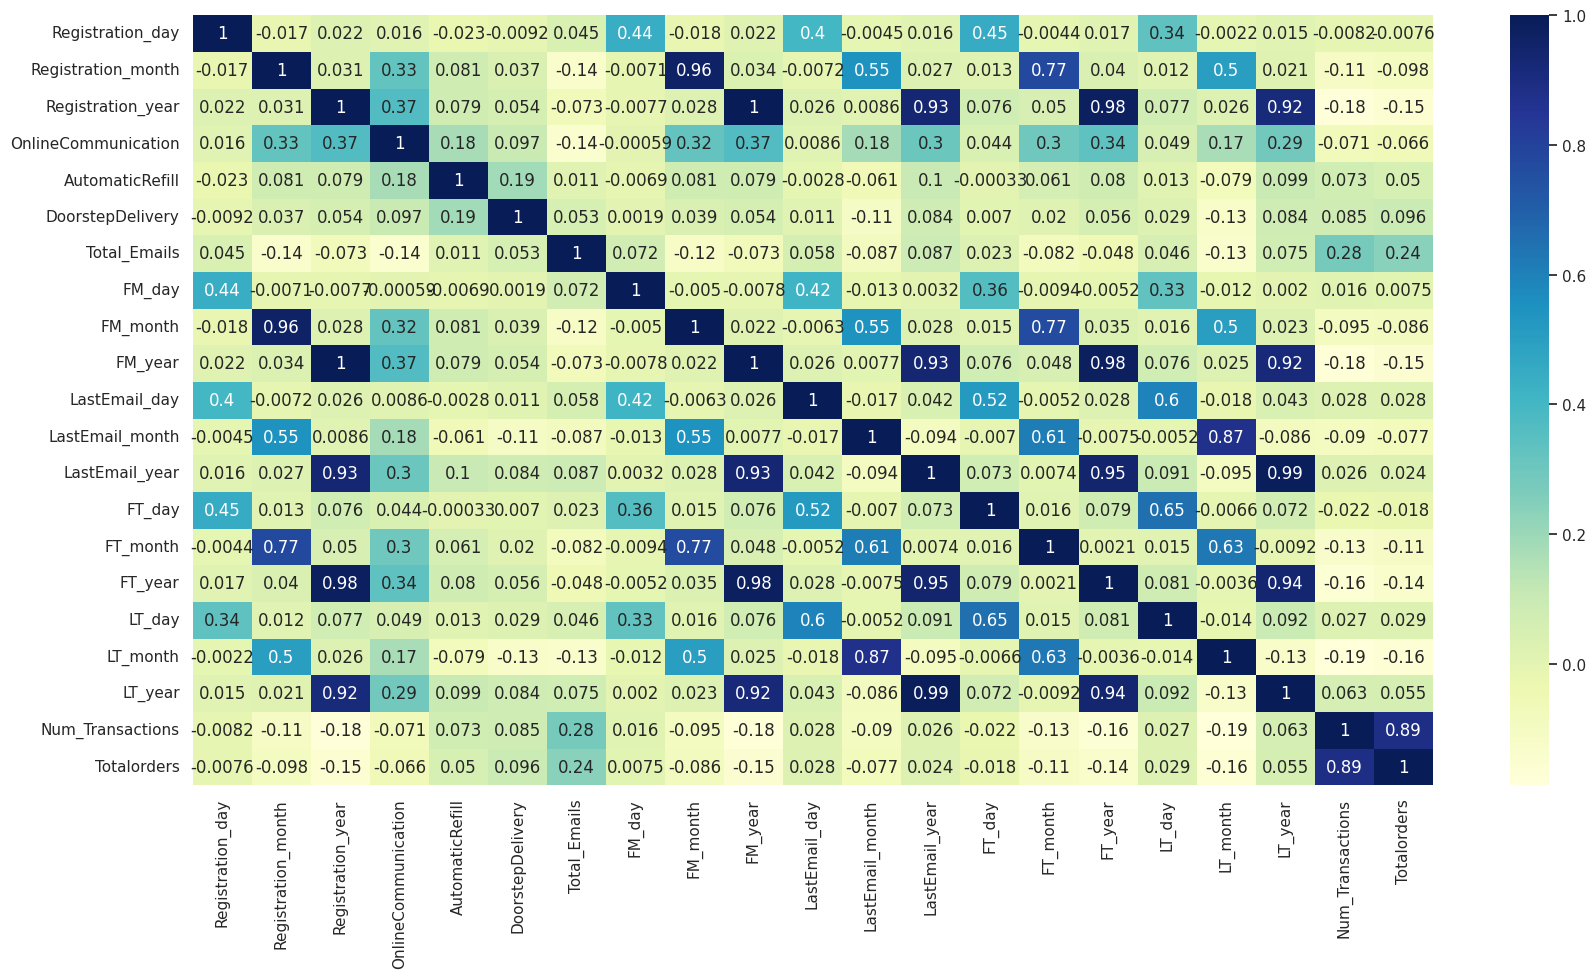

In [88]:
# features correlation with  visualization using seaborn
sns.set(rc={'figure.figsize': (20, 10)})
sns .heatmap(train.corr(),annot=True,annot_kws={'size':12},cmap="YlGnBu")
plt.show()

In [89]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [90]:
#Taking a list of corelated features  
corr_features = correlation(train, 0.9)
len(set(corr_features))

<ipython-input-89-0602f45f5952>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


5

In [91]:
#checking the corelated feature names 
corr_features

{'FM_month', 'FM_year', 'FT_year', 'LT_year', 'LastEmail_year'}

In [92]:
#Droping the corelated columns from traindataset
train=train.drop(corr_features,axis=1)

In [93]:
#Removing CITY string from City column 
train = train.applymap(lambda x: x.replace('CITY', '') if isinstance(x, str) else x)

In [94]:
#Converts the datatype of the categorical column to 'int'.
train = train.astype({'City':'int'})

In [95]:
train.head()

,CustomerID,City,Registration_day,Registration_month,Registration_year,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,...,FM_day,LastEmail_day,LastEmail_month,FT_day,FT_month,LT_day,LT_month,Num_Transactions,Totalorders,RetentionPotential
0,C16368,2,4,9,2012,0,0,0,Monday,CustomizedEmail,...,6,3,7,6,8,6,8,1,15,High
1,C20345,2,6,12,2010,1,1,1,Friday,CustomizedEmail,...,1,3,12,4,4,6,1,186,15614,Low
2,C17683,2,6,10,2010,0,0,0,Wednesday,WelcomeEmail,...,6,6,10,2,12,2,7,13,443,Medium
3,C18647,4,5,11,2010,0,0,0,Monday,CustomizedEmail,...,3,0,12,0,11,0,1,7,748,Low
4,C36692,2,4,12,2009,1,1,0,Friday,CustomizedEmail,...,3,3,1,2,9,3,1,34,2350,Low


In [96]:
#to get only numerical cols 
num=train._get_numeric_data() 
num.head()

,City,Registration_day,Registration_month,Registration_year,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Total_Emails,FM_day,LastEmail_day,LastEmail_month,FT_day,FT_month,LT_day,LT_month,Num_Transactions,Totalorders
0,2,4,9,2012,0,0,0,29,6,3,7,6,8,6,8,1,15
1,2,6,12,2010,1,1,1,95,1,3,12,4,4,6,1,186,15614
2,2,6,10,2010,0,0,0,1,6,6,10,2,12,2,7,13,443
3,4,5,11,2010,0,0,0,30,3,0,12,0,11,0,1,7,748
4,2,4,12,2009,1,1,0,64,3,3,1,2,9,3,1,34,2350


In [97]:
#to get only cat cols and changing it as categorical from object 
cat=train.drop(num,axis=1)
cat=cat.astype('category')
cat.head()

,CustomerID,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,RetentionPotential
0,C16368,Monday,CustomizedEmail,yes,no,High
1,C20345,Friday,CustomizedEmail,yes,no,Low
2,C17683,Wednesday,WelcomeEmail,yes,NotApplicable,Medium
3,C18647,Monday,CustomizedEmail,yes,no,Low
4,C36692,Friday,CustomizedEmail,no,no,Low


In [98]:
cat.RetentionPotential.value_counts()

Low       19185
High       3756
Medium      879
Name: RetentionPotential, dtype: int64

In [99]:
#Removing Target column from categorical features
cat1=cat.drop(['RetentionPotential'],axis=1)

In [100]:
#assign the target variable to t
target=cat.drop(cat1,axis=1)

In [101]:
cat1.head()

,CustomerID,PreferredDeliveryDay,EmailType,MailOpened,MailClicked
0,C16368,Monday,CustomizedEmail,yes,no
1,C20345,Friday,CustomizedEmail,yes,no
2,C17683,Wednesday,WelcomeEmail,yes,NotApplicable
3,C18647,Monday,CustomizedEmail,yes,no
4,C36692,Friday,CustomizedEmail,no,no


In [102]:
#Removing customerID from Categorical Features
cat1=cat1.drop(['CustomerID'],axis=1)

In [103]:
#Assigining Categorical columns to cat_col 
cat_col=cat1.columns

In [104]:
#converting the catregorical variable as num by using Labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [105]:
for col in cat_col:
    cat1[col] = le.fit_transform(cat1[col])

In [106]:
cat1.head()

,PreferredDeliveryDay,EmailType,MailOpened,MailClicked
0,1,0,1,1
1,0,0,1,1
2,6,1,1,0
3,1,0,1,1
4,0,0,0,1


In [107]:
##HAndling categorical feature RetentionPotential to num
target['RetentionPotential']=target['RetentionPotential'].map({'Low':0,'Medium':1,'High':2})
target.head()

,RetentionPotential
0,2
1,0
2,1
3,0
4,0


In [108]:
#Converts the datatype of the categorical column to 'int'.
target = target.astype({'RetentionPotential':'int'})

In [109]:
#checking the dtypes of target column 
target.dtypes

RetentionPotential    int64
dtype: object

In [110]:
#target=pd.DataFrame(target,columns=['RetentionPotential'])
#target.head()

In [111]:
#merging the num cols and dummified data as single data
final_data=cat1.join(num)
final_data.head()

,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,City,Registration_day,Registration_month,Registration_year,OnlineCommunication,AutomaticRefill,...,Total_Emails,FM_day,LastEmail_day,LastEmail_month,FT_day,FT_month,LT_day,LT_month,Num_Transactions,Totalorders
0,1,0,1,1,2,4,9,2012,0,0,...,29,6,3,7,6,8,6,8,1,15
1,0,0,1,1,2,6,12,2010,1,1,...,95,1,3,12,4,4,6,1,186,15614
2,6,1,1,0,2,6,10,2010,0,0,...,1,6,6,10,2,12,2,7,13,443
3,1,0,1,1,4,5,11,2010,0,0,...,30,3,0,12,0,11,0,1,7,748
4,0,0,0,1,2,4,12,2009,1,1,...,64,3,3,1,2,9,3,1,34,2350


In [112]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler object
#scaler = StandardScaler()

# Fit and transform the data
#X = scaler.fit_transform(final_data)

In [113]:
#final_data=pd.DataFrame(X,columns=final_data.columns)
#final_data.head()

#SPLITTING THE DATA INTO TRAIN AND SPLIT

In [114]:
#importing the spliting slibraries to split the data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(final_data,target,random_state=104,test_size=0.25,shuffle=True)

In [115]:
from imblearn.over_sampling import RandomOverSampler
# Initialize the RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Create a new balanced dataset
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)


In [116]:
X_resampled

,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,City,Registration_day,Registration_month,Registration_year,OnlineCommunication,AutomaticRefill,...,Total_Emails,FM_day,LastEmail_day,LastEmail_month,FT_day,FT_month,LT_day,LT_month,Num_Transactions,Totalorders
0,5,1,1,0,2,0,5,2013,0,0,...,1,0,0,5,0,5,0,5,1,55
1,2,1,1,0,3,1,6,2013,1,0,...,1,1,1,6,3,6,3,6,1,100
2,5,0,0,1,3,1,10,2013,1,0,...,36,2,0,11,0,11,0,11,1,30
3,4,1,1,0,4,4,8,2013,1,0,...,1,4,4,8,4,8,4,8,1,48
4,6,0,1,1,3,2,6,2013,1,0,...,48,4,5,12,0,6,1,12,6,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43120,1,1,1,0,3,4,10,2013,1,0,...,1,4,4,10,4,10,4,10,1,41
43121,4,1,1,0,3,0,9,2012,1,0,...,1,0,0,9,0,9,0,9,1,254
43122,4,0,0,1,4,5,6,2013,1,0,...,11,5,5,7,1,7,1,7,1,52
43123,4,1,1,0,2,0,6,2010,0,0,...,1,0,0,6,0,6,0,6,1,19


In [117]:
df_resampled.RetentionPotential.value_counts()

0    14375
2    14375
1    14375
Name: RetentionPotential, dtype: int64

##MODEL BUILDING

In [118]:
#importing required librearies for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic_Regression
Model performance for Traning set
[[ 8900   296  5179]
 [ 1369 10617  2389]
 [ 1069   833 12473]]
-Accuracy:  0.7418
-precision_score:  0.7418
-recall_score:  0.7418
-F1_score:  0.7418
              precision    recall  f1-score   support

           0       0.78      0.62      0.69     14375
           1       0.90      0.74      0.81     14375
           2       0.62      0.87      0.72     14375

    accuracy                           0.74     43125
   macro avg       0.77      0.74      0.74     43125
weighted avg       0.77      0.74      0.74     43125

-------------------------------------------------------------------------------------------------------------------------------
Model performance for Test set
[[3003   99 1708]
 [  19  164   35]
 [  74   49  804]]
-Accuracy:  0.6668
-precision_score:  0.6668
-recall_score:  0.6668
-F1_score:  0.6668
              precision    recall  f1-score   support

           0       0.97      0.62      0.76      4810
    

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

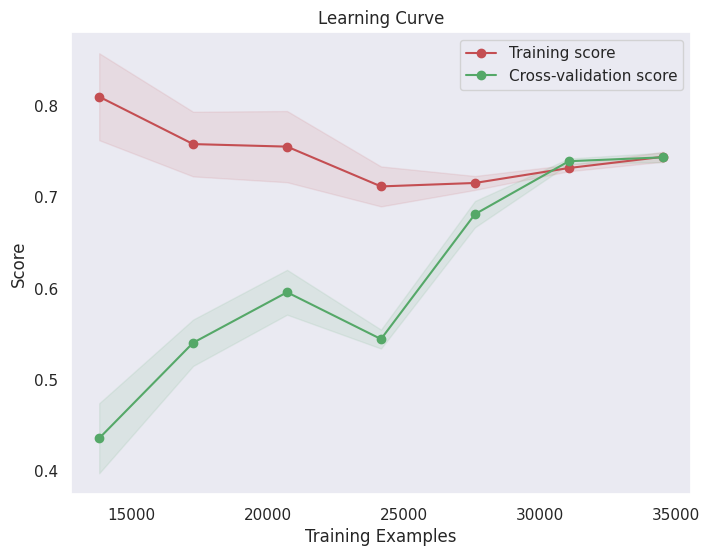

<ipython-input-119-0d47a06458db>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled,y_resampled) # train model


Random_Forest
Model performance for Traning set
[[13741    46   588]
 [    0 14375     0]
 [  146     0 14229]]
-Accuracy:  0.9819
-precision_score:  0.9819
-recall_score:  0.9819
-F1_score:  0.9819
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     14375
           1       1.00      1.00      1.00     14375
           2       0.96      0.99      0.97     14375

    accuracy                           0.98     43125
   macro avg       0.98      0.98      0.98     43125
weighted avg       0.98      0.98      0.98     43125

-------------------------------------------------------------------------------------------------------------------------------
Model performance for Test set
[[4402   22  386]
 [  31  172   15]
 [ 266   18  643]]
-Accuracy:  0.8761
-precision_score:  0.8761
-recall_score:  0.8761
-F1_score:  0.8761
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4810
          

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

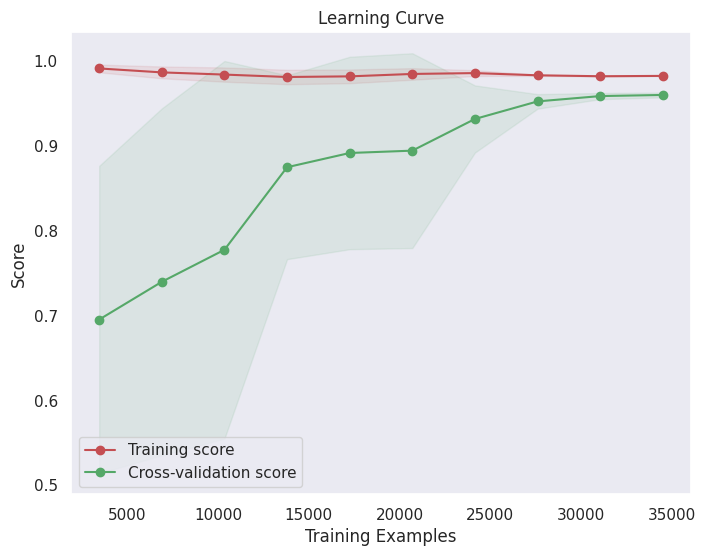

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()
Model performance for Traning set
[[ 8667   863  4845]
 [ 2731  7962  3682]
 [  663    83 13629]]
-Accuracy:  0.7016
-precision_score:  0.7016
-recall_score:  0.7016
-F1_score:  0.7016
              precision    recall  f1-score   support

           0       0.72      0.60      0.66     14375
           1       0.89      0.55      0.68     14375
           2       0.62      0.95      0.75     14375

    accuracy                           0.70     43125
   macro avg       0.74      0.70      0.70     43125
weighted avg       0.74      0.70      0.70     43125

-------------------------------------------------------------------------------------------------------------------------------
Model performance for Test set
[[2906  255 1649]
 [  36  125   57]
 [  42    5  880]]
-Accuracy:  0.6568
-precision_score:  0.6568
-recall_score:  0.6568
-F1_score:  0.6568
              precision    recall  f1-score   support

           0       0.97      0.60      0.75      4810
           

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

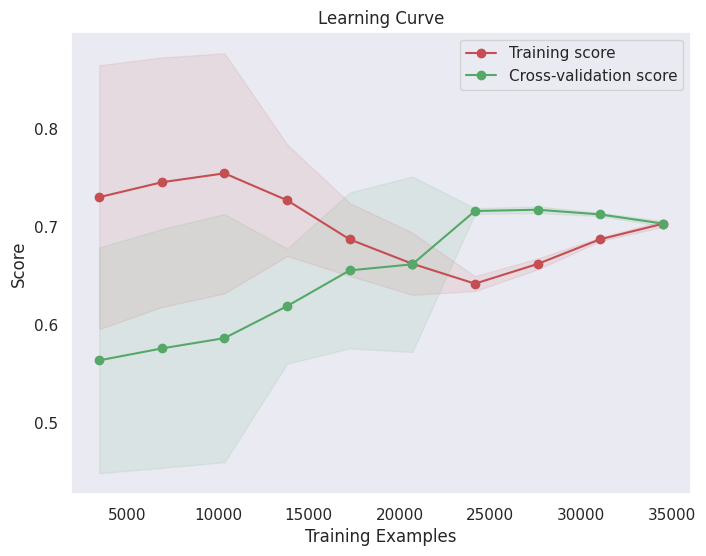

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighbors_Classifier
Model performance for Traning set
[[12280   217  1878]
 [    0 14375     0]
 [  307    12 14056]]
-Accuracy:  0.9440
-precision_score:  0.9440
-recall_score:  0.9440
-F1_score:  0.9440
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     14375
           1       0.98      1.00      0.99     14375
           2       0.88      0.98      0.93     14375

    accuracy                           0.94     43125
   macro avg       0.95      0.94      0.94     43125
weighted avg       0.95      0.94      0.94     43125

-------------------------------------------------------------------------------------------------------------------------------
Model performance for Test set
[[3901  110  799]
 [  30  137   51]
 [ 240   27  660]]
-Accuracy:  0.7889
-precision_score:  0.7889
-recall_score:  0.7889
-F1_score:  0.7889
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4810
  

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

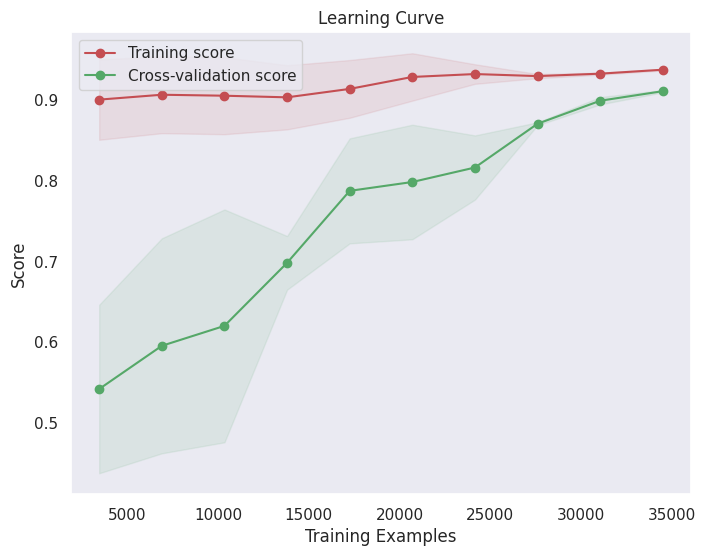



Decision_Tree
Model performance for Traning set
[[11314   742  2319]
 [  776 13441   158]
 [ 1863   704 11808]]
-Accuracy:  0.8478
-precision_score:  0.8478
-recall_score:  0.8478
-F1_score:  0.8478
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     14375
           1       0.90      0.94      0.92     14375
           2       0.83      0.82      0.82     14375

    accuracy                           0.85     43125
   macro avg       0.85      0.85      0.85     43125
weighted avg       0.85      0.85      0.85     43125

-------------------------------------------------------------------------------------------------------------------------------
Model performance for Test set
[[3823  225  762]
 [  11  203    4]
 [ 125   47  755]]
-Accuracy:  0.8029
-precision_score:  0.8029
-recall_score:  0.8029
-F1_score:  0.8029
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      4810
        

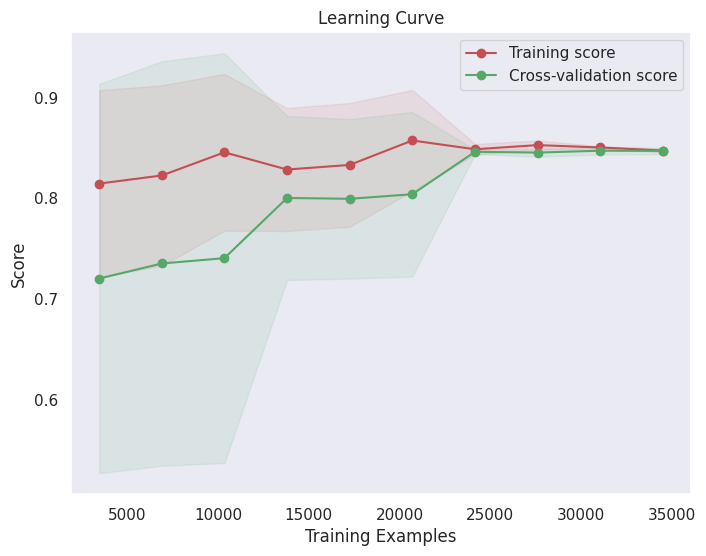

In [119]:
#model building using for loop to train no of algorithems at a time
models={
    'Logistic_Regression':LogisticRegression(),    
    'Random_Forest':RandomForestClassifier(),
    'GaussianNB()':GaussianNB(),
    'KNeighbors_Classifier':KNeighborsClassifier(),
    'Decision_Tree':DecisionTreeClassifier(min_samples_leaf=10, max_leaf_nodes=30, max_depth=8, criterion='entropy', class_weight='balanced')
}





for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_resampled,y_resampled) # train model

  #Make predictions 
  y_train_pred=model.predict(X_resampled)
  y_test_pred=model.predict(x_test)



   #traning set performance
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report 
  from sklearn.model_selection import learning_curve 
  train_accuracy_tr = accuracy_score(y_resampled, y_train_pred)
  train_precision_tr = precision_score(y_resampled, y_train_pred, average='micro')
  train_recall_tr = recall_score(y_resampled, y_train_pred, average='micro')
  train_f1_tr = f1_score(y_resampled, y_train_pred, average='micro')
  train_CR_tr = classification_report(y_resampled, y_train_pred)
  
  
  




   #testset performance
  test_accuracy = accuracy_score(y_test, y_test_pred)
  test_precision = precision_score(y_test, y_test_pred, average='micro')
  test_recall = recall_score(y_test, y_test_pred, average='micro')
  test_f1 = f1_score(y_test, y_test_pred, average='micro')
  test_CR = classification_report(y_test, y_test_pred)
  


  print(list(models.keys())[i])




  print('Model performance for Traning set')
  print(confusion_matrix(y_resampled,y_train_pred))
  print('-Accuracy: {: .4f}'.format(train_accuracy_tr))
  print('-precision_score: {: .4f}'.format(train_precision_tr))
  print('-recall_score: {: .4f}'.format(train_recall_tr))
  print('-F1_score: {: .4f}'.format(train_f1_tr))
  print(classification_report(y_resampled,y_train_pred))
  
  


  print('-------------------------------------------------------------------------------------------------------------------------------')





  print('Model performance for Test set')
  print(confusion_matrix(y_test,y_test_pred))
  print('-Accuracy: {: .4f}'.format(test_accuracy))
  print('-precision_score: {: .4f}'.format(test_precision))
  print('-recall_score: {: .4f}'.format(test_recall))
  print('-F1_score: {: .4f}'.format(test_f1))
  print(classification_report(y_test,y_test_pred))


  train_sizes, train_scores, test_scores = learning_curve(model, X_resampled, y_resampled, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

  # Compute the mean and standard deviation of the training and test scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  # Plot the learning curve
  plt.figure(figsize=(8,6))
  plt.grid()
  plt.title("Learning Curve")
  plt.xlabel("Training Examples")
  plt.ylabel("Score")
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
  plt.legend(loc="best")
  plt.show() 




  print('='*80)
  print('\n')

#XGboost Classifier

In [120]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.1, n_jobs=-1)

# Train your classifier
xgb_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_xg = xgb_model.predict(X_resampled)
# Compute accuracy score
accuracy = accuracy_score(y_resampled, y_pred_xg)
train_recall = recall_score(y_resampled, y_pred_xg, average='micro')
print("Accuracy (XGBoost):", accuracy)
print("recall_score (XGBoost):", train_recall)
print(classification_report(y_resampled,y_pred_xg))
print(confusion_matrix(y_resampled,y_pred_xg))

Accuracy (XGBoost): 0.8738550724637681
recall_score (XGBoost): 0.8738550724637681
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     14375
           1       0.93      0.96      0.94     14375
           2       0.82      0.88      0.85     14375

    accuracy                           0.87     43125
   macro avg       0.87      0.87      0.87     43125
weighted avg       0.87      0.87      0.87     43125

[[11332   574  2469]
 [  351 13747   277]
 [ 1355   414 12606]]


In [121]:
y_pred_xg_test = xgb_model.predict(x_test)
# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred_xg_test)
test_recall = recall_score(y_test, y_pred_xg_test, average='micro')
print("Accuracy (XGBoost):", accuracy)
print("recall_score (XGBoost):", test_recall)
print(classification_report(y_test,y_pred_xg_test))
print(confusion_matrix(y_test,y_pred_xg_test))

Accuracy (XGBoost): 0.8089000839630562
recall_score (XGBoost): 0.8089000839630562
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      4810
           1       0.49      0.94      0.64       218
           2       0.49      0.87      0.63       927

    accuracy                           0.81      5955
   macro avg       0.65      0.87      0.72      5955
weighted avg       0.88      0.81      0.83      5955

[[3809  180  821]
 [   4  206    8]
 [  89   36  802]]


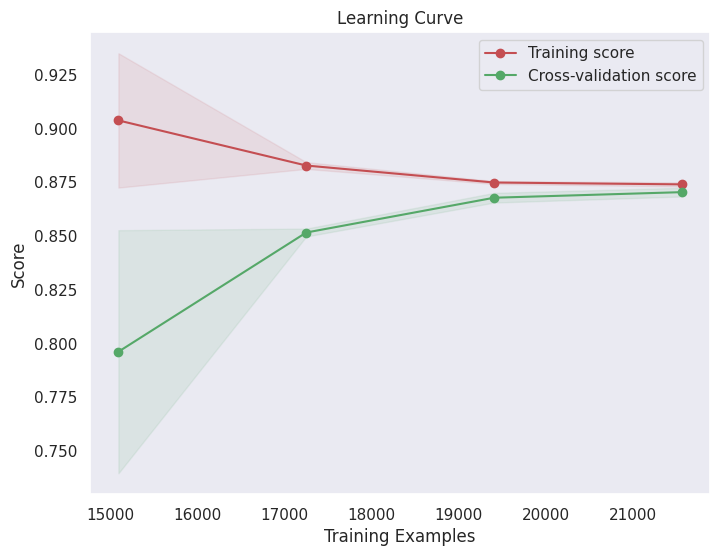

In [122]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_resampled, y_resampled, cv=2, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

#TestData


##Reading the customertest Data

In [123]:
cust_test=pd.read_excel('/content/drive/MyDrive/capstone/test/Customerdata_Test.xlsx')
cust_test.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday


In [124]:
cust_test.shape

(5955, 7)

##Reading the emailtest Data

In [125]:
email_test=pd.read_excel('/content/drive/MyDrive/capstone/test/Emaildata_Test.xlsx')
email_test.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable


In [126]:
email_test.shape

(129074, 6)

##Reading the test Data

In [127]:
test_df=pd.read_excel('/content/drive/MyDrive/capstone/test/Test.xlsx')
test_df

,CustomerID
0,C12121
1,C12132
2,C12134
3,C12135
4,C12136
...,...
5950,C42153
5951,C42155
5952,C42157
5953,C42167


In [128]:
test_df.shape

(5955, 1)

##Reading the transactiontest Data

In [129]:
transaction_test=pd.read_excel('/content/drive/MyDrive/capstone/test/transactionsdata_Test.xlsx')
transaction_test.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179


In [130]:
transaction_test.shape

(26768, 4)

In [131]:
email_test

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable
...,...,...,...,...,...,...
129069,C30169,2018-01-15,CustomizedEmail,13:55:28,no,no
129070,C30169,2018-01-15,CustomizedEmail,15:17:34,no,no
129071,C30169,2018-01-15,CustomizedEmail,10:24:54,yes,yes
129072,C30169,2018-01-15,CustomizedEmail,17:15:26,yes,no


In [132]:
email_test.EmailType.value_counts()

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [133]:
#Grouping the customers who have received welcome mail but not a customized mail
WelcomeEmail_test = email_test[(email_test['EmailType'] == 'WelcomeEmail') & ~(email_test['CustomerID'].isin(email_test[email_test['EmailType'] == 'CustomizedEmail']['CustomerID'].unique()))]
WelcomeEmail_test["CustomerID"].nunique()

2457

In [134]:
WelcomeEmail_test.shape

(2457, 6)

In [135]:
# combine the 'Date of email' and 'Time' columns into a single datetime column
WelcomeEmail_test['Email_Date_Time'] = pd.to_datetime(WelcomeEmail_test['DateOfemail'] +' '+WelcomeEmail_test['timestamp'])

<ipython-input-135-e040cce7134e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WelcomeEmail_test['Email_Date_Time'] = pd.to_datetime(WelcomeEmail_test['DateOfemail'] +' '+WelcomeEmail_test['timestamp'])


In [136]:
WelcomeEmail_test

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable,2010-10-22 16:59:02
5,C31010,2010-04-24,WelcomeEmail,13:08:32,yes,NotApplicable,2010-04-24 13:08:32
8,C23833,2010-08-27,WelcomeEmail,13:19:12,yes,NotApplicable,2010-08-27 13:19:12
10,C38598,2010-11-03,WelcomeEmail,13:35:42,yes,NotApplicable,2010-11-03 13:35:42
13,C20404,2010-05-01,WelcomeEmail,11:26:24,yes,NotApplicable,2010-05-01 11:26:24
...,...,...,...,...,...,...,...
5950,C32947,2018-01-17,WelcomeEmail,13:05:56,yes,NotApplicable,2018-01-17 13:05:56
5951,C28951,2018-01-17,WelcomeEmail,15:45:18,yes,NotApplicable,2018-01-17 15:45:18
5952,C38741,2018-01-17,WelcomeEmail,11:51:28,yes,NotApplicable,2018-01-17 11:51:28
5953,C20407,2018-01-17,WelcomeEmail,10:25:30,yes,NotApplicable,2018-01-17 10:25:30


In [137]:
WelcomeEmail_test.EmailType.value_counts()

WelcomeEmail    2457
Name: EmailType, dtype: int64

In [138]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
welcome__test_uq = WelcomeEmail_test.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of emails
    'Email_Date_Time': ['max','min']# Last email date,first email date
    
})
# Rename the columns to be more descriptive
welcome__test_uq.columns = ['Total_Emails','Last_Email_Date','First_Email_Date']
welcome__test_uq = welcome__test_uq.reset_index(drop=False)

In [139]:
# merge the grouped DataFrame back with the main DataFrame
welcomemail_test = pd.merge(WelcomeEmail_test, welcome__test_uq, on=['CustomerID'],how="inner")

In [140]:
welcomemail_test.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time,Total_Emails,Last_Email_Date,First_Email_Date
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable,2010-10-22 16:59:02,1,2010-10-22 16:59:02,2010-10-22 16:59:02
1,C31010,2010-04-24,WelcomeEmail,13:08:32,yes,NotApplicable,2010-04-24 13:08:32,1,2010-04-24 13:08:32,2010-04-24 13:08:32
2,C23833,2010-08-27,WelcomeEmail,13:19:12,yes,NotApplicable,2010-08-27 13:19:12,1,2010-08-27 13:19:12,2010-08-27 13:19:12
3,C38598,2010-11-03,WelcomeEmail,13:35:42,yes,NotApplicable,2010-11-03 13:35:42,1,2010-11-03 13:35:42,2010-11-03 13:35:42
4,C20404,2010-05-01,WelcomeEmail,11:26:24,yes,NotApplicable,2010-05-01 11:26:24,1,2010-05-01 11:26:24,2010-05-01 11:26:24


In [141]:
#Checking the all possible categories based on Mailopened & Mailchecked
email_test.groupby(['EmailType',])['MailOpened','MailClicked'].value_counts()

<ipython-input-141-8dbbf5662128>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  email_test.groupby(['EmailType',])['MailOpened','MailClicked'].value_counts()


EmailType        MailOpened  MailClicked  
CustomizedEmail  no          no               92211
                 yes         no               23990
                             yes               6833
                 no          yes                 85
WelcomeEmail     yes         NotApplicable     5955
dtype: int64

In [142]:
#Checking the all possible categories based on Mailopened & Mailchecked
mail_names_test=email_test.groupby(['EmailType',])['MailOpened','MailClicked'].value_counts().index

<ipython-input-142-da2d6c606874>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mail_names_test=email_test.groupby(['EmailType',])['MailOpened','MailClicked'].value_counts().index


In [143]:
#Checking the all possible categories based on Mailopened & Mailchecked
mail_val_test=email_test.groupby(['EmailType',])['MailOpened','MailClicked'].value_counts().values

<ipython-input-143-246fe71a4fd7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mail_val_test=email_test.groupby(['EmailType',])['MailOpened','MailClicked'].value_counts().values


([<matplotlib.patches.Wedge at 0x7fc5dcb1c1c0>,
 [Text(-0.686158768555832, 0.8597593525713718, "('CustomizedEmail', 'no', 'no')"),
  Text(0.3877576328961089, -1.0293901195031971, "('CustomizedEmail', 'yes', 'no')"),
  Text(0.9854954676284534, -0.48867032167277785, "('CustomizedEmail', 'yes', 'yes')"),
  Text(1.0534523395963078, -0.3166041190494302, "('CustomizedEmail', 'no', 'yes')"),
  Text(1.088465815727639, -0.15887783984044376, "('WelcomeEmail', 'yes', 'NotApplicable')")],
 [Text(-0.37426841921227194, 0.46895964685711183, '71.44%'),
  Text(0.21150416339787753, -0.5614855197290166, '18.59%'),
  Text(0.5375429823427927, -0.2665474481851515, '5.29%'),
  Text(0.5746103670525314, -0.17269315584514375, '0.07%'),
  Text(0.5937086267605303, -0.08666063991296931, '4.61%')])

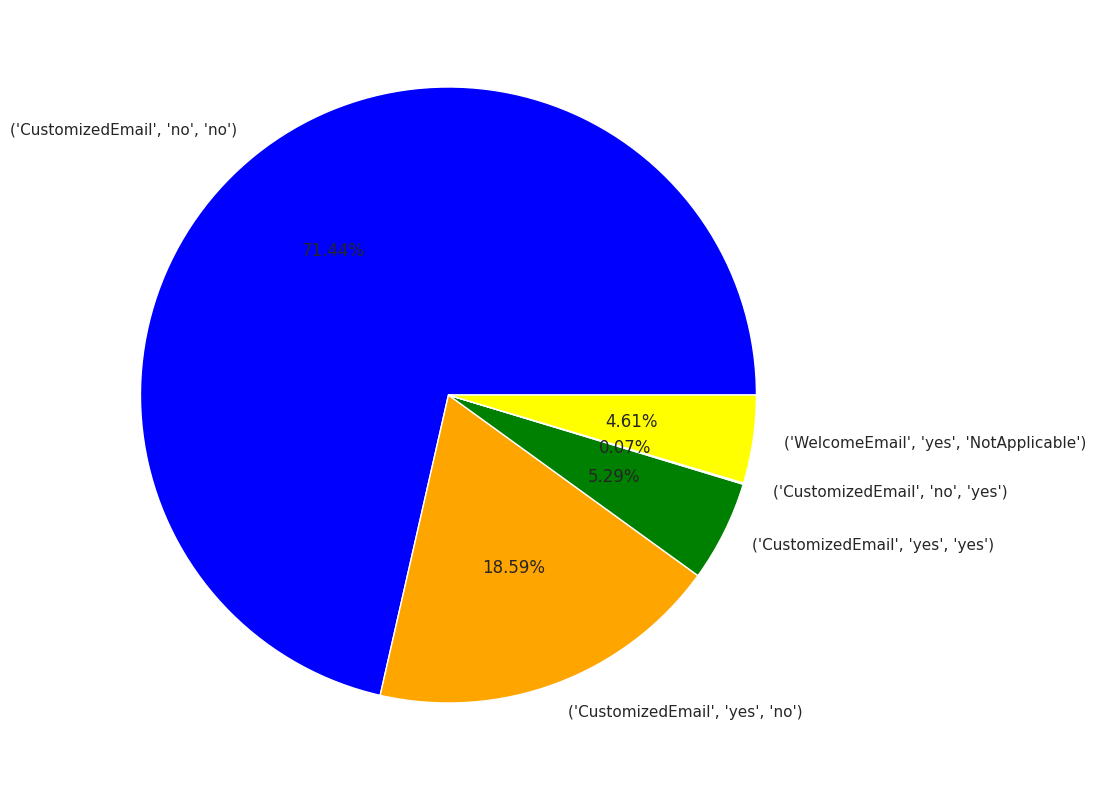

In [144]:
colors=['blue','orange','green','red','yellow']
plt.pie(mail_val_test,labels=mail_names_test,colors=colors,autopct='%1.2f%%')

In [145]:
#Separating CustomizedEmail as a Dataset
CustomizedEmail_test = email_test[email_test['EmailType'] =='CustomizedEmail']
CustomizedEmail_test

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
5955,C12403,2012-03-06,CustomizedEmail,14:35:22,yes,no
5956,C12403,2009-10-13,CustomizedEmail,12:04:00,yes,no
5957,C12403,2010-09-09,CustomizedEmail,16:51:58,yes,no
5958,C12403,2011-02-13,CustomizedEmail,17:03:26,yes,no
5959,C12403,2012-08-15,CustomizedEmail,10:13:08,no,no
...,...,...,...,...,...,...
129069,C30169,2018-01-15,CustomizedEmail,13:55:28,no,no
129070,C30169,2018-01-15,CustomizedEmail,15:17:34,no,no
129071,C30169,2018-01-15,CustomizedEmail,10:24:54,yes,yes
129072,C30169,2018-01-15,CustomizedEmail,17:15:26,yes,no


In [146]:
CustomizedEmail_test.CustomerID.value_counts()

C14650    279
C28017    194
C33489    174
C25640     80
C41414     72
         ... 
C23392      1
C15772      1
C18671      1
C24945      1
C23457      1
Name: CustomerID, Length: 3498, dtype: int64

In [147]:
# combine the 'Date of email' and 'Time' columns into a single datetime column
CustomizedEmail_test['Email_Date_Time'] = pd.to_datetime(CustomizedEmail_test['DateOfemail'] +' '+CustomizedEmail_test['timestamp'])

<ipython-input-147-66ae8d842fae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomizedEmail_test['Email_Date_Time'] = pd.to_datetime(CustomizedEmail_test['DateOfemail'] +' '+CustomizedEmail_test['timestamp'])


In [148]:
#Sampledata of CustomizedEmail is not opened and aslo not clicked
CustomizedEmail_test_1 = CustomizedEmail_test[(CustomizedEmail_test['MailOpened'] =='no') & (CustomizedEmail_test['MailClicked'] == 'no')]
CustomizedEmail_test_1

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time
5959,C12403,2012-08-15,CustomizedEmail,10:13:08,no,no,2012-08-15 10:13:08
5964,C12403,2012-12-24,CustomizedEmail,10:46:50,no,no,2012-12-24 10:46:50
5969,C12403,2012-02-10,CustomizedEmail,17:32:36,no,no,2012-02-10 17:32:36
5974,C12403,2010-10-31,CustomizedEmail,17:20:20,no,no,2010-10-31 17:20:20
5978,C12403,2013-07-21,CustomizedEmail,17:53:10,no,no,2013-07-21 17:53:10
...,...,...,...,...,...,...,...
129065,C30169,2018-01-15,CustomizedEmail,15:54:00,no,no,2018-01-15 15:54:00
129066,C30169,2018-01-15,CustomizedEmail,12:42:34,no,no,2018-01-15 12:42:34
129067,C30169,2018-01-15,CustomizedEmail,16:38:52,no,no,2018-01-15 16:38:52
129069,C30169,2018-01-15,CustomizedEmail,13:55:28,no,no,2018-01-15 13:55:28


In [149]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
cust_test_nn = CustomizedEmail_test_1.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of emails
    'Email_Date_Time': ['max','min'], # Last email date,first email date
})
# Rename the columns to be more descriptive

cust_test_nn.columns = ['numofemails','Last_Email_Date','First_Email_Date']
cust_test_nn = cust_test_nn.reset_index(drop=False)

In [150]:
cust_test_nn

,CustomerID,numofemails,Last_Email_Date,First_Email_Date
0,C12121,16,2017-12-13 16:29:20,2017-12-05 13:50:46
1,C12135,21,2018-01-10 13:42:12,2017-11-06 11:03:28
2,C12136,38,2013-10-19 15:11:16,2013-09-29 12:28:48
3,C12157,14,2013-11-25 11:50:00,2013-10-12 11:20:48
4,C12163,45,2012-11-19 15:11:20,2012-10-29 10:41:54
...,...,...,...,...
3371,C42147,25,2013-11-30 17:52:10,2013-10-29 16:30:12
3372,C42148,40,2011-11-11 14:15:46,2009-10-02 12:32:44
3373,C42151,36,2013-02-12 16:37:38,2011-12-12 14:30:22
3374,C42153,8,2012-11-08 16:11:14,2012-09-10 16:28:18


In [151]:
#Sampledata of CustomizedEmail is opened but not clicked
CustomizedEmail_test_2 = CustomizedEmail_test[(CustomizedEmail_test['MailOpened'] =='yes') & (CustomizedEmail_test['MailClicked'] == 'no')]
CustomizedEmail_test_2

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time
5955,C12403,2012-03-06,CustomizedEmail,14:35:22,yes,no,2012-03-06 14:35:22
5956,C12403,2009-10-13,CustomizedEmail,12:04:00,yes,no,2009-10-13 12:04:00
5957,C12403,2010-09-09,CustomizedEmail,16:51:58,yes,no,2010-09-09 16:51:58
5958,C12403,2011-02-13,CustomizedEmail,17:03:26,yes,no,2011-02-13 17:03:26
5960,C12403,2011-06-15,CustomizedEmail,11:14:32,yes,no,2011-06-15 11:14:32
...,...,...,...,...,...,...,...
129052,C35127,2017-12-21,CustomizedEmail,15:00:44,yes,no,2017-12-21 15:00:44
129053,C35127,2018-01-08,CustomizedEmail,15:22:34,yes,no,2018-01-08 15:22:34
129054,C35127,2018-01-09,CustomizedEmail,17:29:44,yes,no,2018-01-09 17:29:44
129072,C30169,2018-01-15,CustomizedEmail,17:15:26,yes,no,2018-01-15 17:15:26


In [152]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
cust_test_yn = CustomizedEmail_test_2.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of emails
    'Email_Date_Time': ['max','min'], # Last email date,first email date
})
# Rename the columns to be more descriptive
cust_test_yn.columns = ['numofemails','Last_Email_Date','First_Email_Date']
cust_test_yn = cust_test_yn.reset_index(drop=False)

In [153]:
cust_test_yn

,CustomerID,numofemails,Last_Email_Date,First_Email_Date
0,C12121,5,2017-12-13 10:51:08,2017-12-06 17:51:06
1,C12135,3,2017-12-16 16:10:44,2017-11-02 14:49:22
2,C12136,2,2013-10-11 17:59:08,2013-09-29 10:26:54
3,C12157,13,2013-11-24 10:59:58,2013-10-05 17:55:22
4,C12163,1,2012-11-01 17:23:38,2012-11-01 17:23:38
...,...,...,...,...
2900,C42147,6,2013-11-26 12:36:22,2013-11-08 16:23:08
2901,C42148,4,2011-10-13 15:39:18,2009-12-28 12:13:06
2902,C42151,6,2012-12-09 15:16:54,2012-08-05 13:53:22
2903,C42153,1,2012-10-21 11:46:08,2012-10-21 11:46:08


In [154]:
#Sampledata of CustomizedEmail is not opened but clicked
CustomizedEmail_test_3 = CustomizedEmail_test[(CustomizedEmail_test['MailOpened'] =='no') & (CustomizedEmail_test['MailClicked'] == 'yes')]
CustomizedEmail_test_3

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time
6151,C30981,2011-06-01,CustomizedEmail,14:11:32,no,yes,2011-06-01 14:11:32
10903,C25149,2011-12-05,CustomizedEmail,17:15:22,no,yes,2011-12-05 17:15:22
12457,C16762,2013-07-28,CustomizedEmail,14:57:30,no,yes,2013-07-28 14:57:30
13635,C30976,2013-06-11,CustomizedEmail,13:08:38,no,yes,2013-06-11 13:08:38
16608,C26423,2013-03-09,CustomizedEmail,14:38:42,no,yes,2013-03-09 14:38:42
...,...,...,...,...,...,...,...
120957,C41567,2017-10-20,CustomizedEmail,10:36:52,no,yes,2017-10-20 10:36:52
121594,C35016,2017-09-24,CustomizedEmail,11:22:30,no,yes,2017-09-24 11:22:30
123623,C22029,2017-10-10,CustomizedEmail,17:25:30,no,yes,2017-10-10 17:25:30
125261,C12466,2017-10-18,CustomizedEmail,10:53:26,no,yes,2017-10-18 10:53:26


In [155]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
cust_test_ny = CustomizedEmail_test_3.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of emails
    'Email_Date_Time': ['max','min'], # Last email date,first email date
})
# Rename the columns to be more descriptive
cust_test_ny.columns = ['numofemails','Last_Email_Date','First_Email_Date']
cust_test_ny = cust_test_ny.reset_index(drop=False)

In [156]:
cust_test_ny

,CustomerID,numofemails,Last_Email_Date,First_Email_Date
0,C12258,1,2013-04-01 13:27:36,2013-04-01 13:27:36
1,C12466,1,2017-10-18 10:53:26,2017-10-18 10:53:26
2,C13523,1,2013-08-14 10:10:50,2013-08-14 10:10:50
3,C13660,1,2013-11-05 12:26:38,2013-11-05 12:26:38
4,C14135,1,2016-02-14 16:07:12,2016-02-14 16:07:12
...,...,...,...,...
80,C41179,1,2013-12-22 15:13:22,2013-12-22 15:13:22
81,C41492,1,2013-09-28 10:34:00,2013-09-28 10:34:00
82,C41567,1,2017-10-20 10:36:52,2017-10-20 10:36:52
83,C41575,1,2015-06-01 10:04:16,2015-06-01 10:04:16


In [157]:
#Sampledata of CustomizedEmail is opened and also clicked
CustomizedEmail_test_4 =  CustomizedEmail_test[(CustomizedEmail_test['MailOpened'] == 'yes') & (CustomizedEmail_test['MailClicked'] == 'yes')]
CustomizedEmail_test_4

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time
5967,C12403,2009-01-29,CustomizedEmail,17:48:10,yes,yes,2009-01-29 17:48:10
5970,C12403,2013-05-21,CustomizedEmail,13:49:44,yes,yes,2013-05-21 13:49:44
5976,C12403,2013-08-07,CustomizedEmail,14:00:54,yes,yes,2013-08-07 14:00:54
5985,C12403,2011-08-21,CustomizedEmail,16:49:14,yes,yes,2011-08-21 16:49:14
5991,C12403,2011-08-25,CustomizedEmail,16:30:34,yes,yes,2011-08-25 16:30:34
...,...,...,...,...,...,...,...
129055,C35127,2017-12-25,CustomizedEmail,12:15:44,yes,yes,2017-12-25 12:15:44
129059,C28149,2018-01-20,CustomizedEmail,12:34:34,yes,yes,2018-01-20 12:34:34
129061,C28149,2018-01-21,CustomizedEmail,17:07:26,yes,yes,2018-01-21 17:07:26
129068,C30169,2018-01-15,CustomizedEmail,15:19:00,yes,yes,2018-01-15 15:19:00


In [158]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
cust_test_yy = CustomizedEmail_test_4.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of emails
    'Email_Date_Time': ['max','min'], # Last DateOfemail,first DateOfemail
})
# Rename the columns to be more descriptive
cust_test_yy.columns = ['numofemails','Last_Email_Date','First_Email_Date']
cust_test_yy = cust_test_yy.reset_index(drop=False)

In [159]:
cust_test_yy

,CustomerID,numofemails,Last_Email_Date,First_Email_Date
0,C12121,3,2017-12-11 16:41:04,2017-12-06 11:05:46
1,C12135,5,2017-12-30 14:09:52,2017-11-18 16:10:24
2,C12136,1,2013-10-19 11:07:48,2013-10-19 11:07:48
3,C12167,4,2013-11-03 16:49:16,2013-11-03 12:31:14
4,C12198,1,2011-10-17 14:34:50,2011-10-17 14:34:50
...,...,...,...,...
2079,C42147,5,2013-11-22 12:30:14,2013-11-12 16:24:56
2080,C42148,2,2010-11-30 11:30:42,2010-05-03 10:12:50
2081,C42151,3,2012-09-02 16:11:54,2012-01-02 16:04:38
2082,C42153,1,2012-10-25 11:33:16,2012-10-25 11:33:16


In [160]:
CustomizedEmail_test_concat = pd.concat([cust_test_nn, cust_test_yn, cust_test_ny, cust_test_yy])
CustomizedEmail_test_concat

,CustomerID,numofemails,Last_Email_Date,First_Email_Date
0,C12121,16,2017-12-13 16:29:20,2017-12-05 13:50:46
1,C12135,21,2018-01-10 13:42:12,2017-11-06 11:03:28
2,C12136,38,2013-10-19 15:11:16,2013-09-29 12:28:48
3,C12157,14,2013-11-25 11:50:00,2013-10-12 11:20:48
4,C12163,45,2012-11-19 15:11:20,2012-10-29 10:41:54
...,...,...,...,...
2079,C42147,5,2013-11-22 12:30:14,2013-11-12 16:24:56
2080,C42148,2,2010-11-30 11:30:42,2010-05-03 10:12:50
2081,C42151,3,2012-09-02 16:11:54,2012-01-02 16:04:38
2082,C42153,1,2012-10-25 11:33:16,2012-10-25 11:33:16


In [161]:
# Group the data by customer ID and calculate the number of emails sent to customer,first email sent, and last email date
CustomizedEmail_test_1 = CustomizedEmail_test_concat.groupby('CustomerID').agg({
    'First_Email_Date': ['min'],#First email date
    'Last_Email_Date': ['max'], # Last email date
    'numofemails' : 'sum', # TotalEMails
})
# Rename the columns to be more descriptive
CustomizedEmail_test_1.columns = ['First_Email_Date','Last_Email_Date','Total_Emails']
CustomizedEmail_test_1 = CustomizedEmail_test_1.reset_index(drop=False)

In [162]:
CustomizedEmail_test_1

,CustomerID,First_Email_Date,Last_Email_Date,Total_Emails
0,C12121,2017-12-05 13:50:46,2017-12-13 16:29:20,24
1,C12135,2017-11-02 14:49:22,2018-01-10 13:42:12,29
2,C12136,2013-09-29 10:26:54,2013-10-19 15:11:16,41
3,C12157,2013-10-05 17:55:22,2013-11-25 11:50:00,27
4,C12163,2012-10-29 10:41:54,2012-11-19 15:11:20,46
...,...,...,...,...
3493,C42147,2013-10-29 16:30:12,2013-11-30 17:52:10,36
3494,C42148,2009-10-02 12:32:44,2011-11-11 14:15:46,46
3495,C42151,2011-12-12 14:30:22,2013-02-12 16:37:38,45
3496,C42153,2012-09-10 16:28:18,2012-11-08 16:11:14,10


In [163]:
CustomizedEmail_test_1['DateOfemail'] = CustomizedEmail_test_1['Last_Email_Date'].dt.date.astype(str)
CustomizedEmail_test_1['timestamp'] = CustomizedEmail_test_1['Last_Email_Date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))

In [164]:
CustomizedEmail_test_1

,CustomerID,First_Email_Date,Last_Email_Date,Total_Emails,DateOfemail,timestamp
0,C12121,2017-12-05 13:50:46,2017-12-13 16:29:20,24,2017-12-13,16:29:20
1,C12135,2017-11-02 14:49:22,2018-01-10 13:42:12,29,2018-01-10,13:42:12
2,C12136,2013-09-29 10:26:54,2013-10-19 15:11:16,41,2013-10-19,15:11:16
3,C12157,2013-10-05 17:55:22,2013-11-25 11:50:00,27,2013-11-25,11:50:00
4,C12163,2012-10-29 10:41:54,2012-11-19 15:11:20,46,2012-11-19,15:11:20
...,...,...,...,...,...,...
3493,C42147,2013-10-29 16:30:12,2013-11-30 17:52:10,36,2013-11-30,17:52:10
3494,C42148,2009-10-02 12:32:44,2011-11-11 14:15:46,46,2011-11-11,14:15:46
3495,C42151,2011-12-12 14:30:22,2013-02-12 16:37:38,45,2013-02-12,16:37:38
3496,C42153,2012-09-10 16:28:18,2012-11-08 16:11:14,10,2012-11-08,16:11:14


In [165]:
# merge the grouped DataFrame back with the main DataFrame
final_cust_test = pd.merge(CustomizedEmail_test, CustomizedEmail_test_1, on=['CustomerID','DateOfemail','timestamp'],how="inner")

In [166]:
final_cust_test

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time,First_Email_Date,Last_Email_Date,Total_Emails
0,C12403,2013-12-29,CustomizedEmail,13:32:42,yes,no,2013-12-29 13:32:42,2008-11-25 15:40:12,2013-12-29 13:32:42,46
1,C19041,2013-12-31,CustomizedEmail,13:02:12,no,no,2013-12-31 13:02:12,2011-02-07 11:00:44,2013-12-31 13:02:12,60
2,C24069,2010-11-08,CustomizedEmail,17:25:24,no,no,2010-11-08 17:25:24,2010-09-19 10:07:08,2010-11-08 17:25:24,45
3,C26718,2014-01-12,CustomizedEmail,11:33:42,yes,no,2014-01-12 11:33:42,2011-03-26 10:20:28,2014-01-12 11:33:42,13
4,C24517,2011-10-21,CustomizedEmail,11:25:02,yes,no,2011-10-21 11:25:02,2010-08-17 10:24:30,2011-10-21 11:25:02,31
...,...,...,...,...,...,...,...,...,...,...
3493,C19466,2018-01-05,CustomizedEmail,17:04:34,no,no,2018-01-05 17:04:34,2017-12-20 13:01:30,2018-01-05 17:04:34,10
3494,C37550,2018-01-19,CustomizedEmail,16:25:00,yes,no,2018-01-19 16:25:00,2018-01-13 10:31:32,2018-01-19 16:25:00,7
3495,C35127,2018-01-09,CustomizedEmail,17:29:44,yes,no,2018-01-09 17:29:44,2017-12-20 12:34:06,2018-01-09 17:29:44,5
3496,C28149,2018-01-21,CustomizedEmail,17:07:26,yes,yes,2018-01-21 17:07:26,2018-01-15 14:23:56,2018-01-21 17:07:26,8


In [167]:
#Concating the Welcomemaildata and Customizeddata
Emaildata_test=pd.concat([welcomemail_test,final_cust_test])

In [168]:
Emaildata_test

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time,Total_Emails,Last_Email_Date,First_Email_Date
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable,2010-10-22 16:59:02,1,2010-10-22 16:59:02,2010-10-22 16:59:02
1,C31010,2010-04-24,WelcomeEmail,13:08:32,yes,NotApplicable,2010-04-24 13:08:32,1,2010-04-24 13:08:32,2010-04-24 13:08:32
2,C23833,2010-08-27,WelcomeEmail,13:19:12,yes,NotApplicable,2010-08-27 13:19:12,1,2010-08-27 13:19:12,2010-08-27 13:19:12
3,C38598,2010-11-03,WelcomeEmail,13:35:42,yes,NotApplicable,2010-11-03 13:35:42,1,2010-11-03 13:35:42,2010-11-03 13:35:42
4,C20404,2010-05-01,WelcomeEmail,11:26:24,yes,NotApplicable,2010-05-01 11:26:24,1,2010-05-01 11:26:24,2010-05-01 11:26:24
...,...,...,...,...,...,...,...,...,...,...
3493,C19466,2018-01-05,CustomizedEmail,17:04:34,no,no,2018-01-05 17:04:34,10,2018-01-05 17:04:34,2017-12-20 13:01:30
3494,C37550,2018-01-19,CustomizedEmail,16:25:00,yes,no,2018-01-19 16:25:00,7,2018-01-19 16:25:00,2018-01-13 10:31:32
3495,C35127,2018-01-09,CustomizedEmail,17:29:44,yes,no,2018-01-09 17:29:44,5,2018-01-09 17:29:44,2017-12-20 12:34:06
3496,C28149,2018-01-21,CustomizedEmail,17:07:26,yes,yes,2018-01-21 17:07:26,8,2018-01-21 17:07:26,2018-01-15 14:23:56


##TransactionData_test

In [169]:
transaction_test

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179
...,...,...,...,...
26763,C32947,2018-01-17,21:35:26,41
26764,C28951,2018-01-17,17:05:50,40
26765,C38741,2018-01-17,18:56:16,36
26766,C20407,2018-01-17,10:24:52,75


In [170]:
# combine the 'Dateoforder' and 'Timestamp' columns into a single datetime column
transaction_test['Transaction_Date_Time'] = pd.to_datetime(transaction_test['DateOfOrder'] +' '+transaction_test['timestamp'])

In [171]:
# Group the data by customer ID and calculate the number of transactions, total amount spent, and last transaction date
transaction__test_uq = transaction_test.groupby('CustomerID').agg({
    'CustomerID': 'count', # Number of transactions
    'OrderQuantity': 'sum', # Total orders
    'Transaction_Date_Time': ['min', 'max'],# Last transaction date
})
# Rename the columns to be more descriptive
transaction__test_uq.columns = ['Num_Transactions','Totalorders','First_Transaction_Date','Last_Transaction_Date',]
transaction__test_uq = transaction__test_uq.reset_index(drop=False)

In [172]:
transaction__test_uq['DateOfOrder'] = transaction__test_uq['Last_Transaction_Date'].dt.date.astype(str)
transaction__test_uq['timestamp'] = transaction__test_uq['Last_Transaction_Date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))

In [173]:
# merge the grouped DataFrame back with the main DataFrame
final_transaction_test = pd.merge(transaction_test, transaction__test_uq, on=['CustomerID','DateOfOrder','timestamp'],how="inner")
final_transaction_test

,CustomerID,DateOfOrder,timestamp,OrderQuantity,Transaction_Date_Time,Num_Transactions,Totalorders,First_Transaction_Date,Last_Transaction_Date
0,C17838,2011-03-28,17:41:08,55,2011-03-28 17:41:08,1,55,2011-03-28 17:41:08,2011-03-28 17:41:08
1,C12403,2014-01-14,10:57:06,182,2014-01-14 10:57:06,168,29537,2010-10-12 15:58:02,2014-01-14 10:57:06
2,C19041,2014-01-16,17:46:14,107,2014-01-16 17:46:14,122,14321,2011-05-16 14:36:36,2014-01-16 17:46:14
3,C24069,2010-11-09,18:31:18,47,2010-11-09 18:31:18,1,47,2010-11-09 18:31:18,2010-11-09 18:31:18
4,C26718,2014-01-12,13:04:04,159,2014-01-12 13:04:04,129,20238,2011-01-25 17:08:08,2014-01-12 13:04:04
...,...,...,...,...,...,...,...,...,...
5950,C32947,2018-01-17,21:35:26,41,2018-01-17 21:35:26,1,41,2018-01-17 21:35:26,2018-01-17 21:35:26
5951,C28951,2018-01-17,17:05:50,40,2018-01-17 17:05:50,1,40,2018-01-17 17:05:50,2018-01-17 17:05:50
5952,C38741,2018-01-17,18:56:16,36,2018-01-17 18:56:16,1,36,2018-01-17 18:56:16,2018-01-17 18:56:16
5953,C20407,2018-01-17,10:24:52,75,2018-01-17 10:24:52,1,75,2018-01-17 10:24:52,2018-01-17 10:24:52


##Final Transformed Transaction Dataset
*********************************************************************
Here I am droping OrderQuantity , DateOfOrder , timestamp and Transaction_Date_Time because, 

> OrderQuantity : Here I am droping OrderQuantity because it belongs to a perticular day and time as we combined no.of orders into single order by using group function.

> DateOfOrder: Droping DateOfOrder column it is similar as Last_Transaction_Date 

> timestamp :  Droping timestamp column it is similar as Last_Transaction_Date timestamp.

> Transaction_Date_Time : Droping Transaction_Date_Time column it is similar as Last_Transaction_Date










In [174]:
transactiondata_test=final_transaction_test.drop(['OrderQuantity','DateOfOrder','timestamp','Transaction_Date_Time'],axis=1)

In [175]:
transactiondata_test

,CustomerID,Num_Transactions,Totalorders,First_Transaction_Date,Last_Transaction_Date
0,C17838,1,55,2011-03-28 17:41:08,2011-03-28 17:41:08
1,C12403,168,29537,2010-10-12 15:58:02,2014-01-14 10:57:06
2,C19041,122,14321,2011-05-16 14:36:36,2014-01-16 17:46:14
3,C24069,1,47,2010-11-09 18:31:18,2010-11-09 18:31:18
4,C26718,129,20238,2011-01-25 17:08:08,2014-01-12 13:04:04
...,...,...,...,...,...
5950,C32947,1,41,2018-01-17 21:35:26,2018-01-17 21:35:26
5951,C28951,1,40,2018-01-17 17:05:50,2018-01-17 17:05:50
5952,C38741,1,36,2018-01-17 18:56:16,2018-01-17 18:56:16
5953,C20407,1,75,2018-01-17 10:24:52,2018-01-17 10:24:52


##FinalDataset_test

In [176]:
# merge the datasets on a common column
test_data = pd.merge(cust_test, transactiondata_test, on="CustomerID",how ='inner')
test_data = pd.merge(test_data, Emaildata_test, on="CustomerID",how ='inner')
test_data = pd.merge(test_data, test_df, on="CustomerID",how ='inner')

In [177]:
test_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Num_Transactions,Totalorders,First_Transaction_Date,Last_Transaction_Date,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Date_Time,Total_Emails,Last_Email_Date,First_Email_Date
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,1,55,2011-03-28 17:41:08,2011-03-28 17:41:08,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable,2010-10-22 16:59:02,1,2010-10-22 16:59:02,2010-10-22 16:59:02
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,168,29537,2010-10-12 15:58:02,2014-01-14 10:57:06,2013-12-29,CustomizedEmail,13:32:42,yes,no,2013-12-29 13:32:42,46,2013-12-29 13:32:42,2008-11-25 15:40:12
2,C19041,CITY4,2011-01-24,0,1,0,Friday,122,14321,2011-05-16 14:36:36,2014-01-16 17:46:14,2013-12-31,CustomizedEmail,13:02:12,no,no,2013-12-31 13:02:12,60,2013-12-31 13:02:12,2011-02-07 11:00:44
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday,1,47,2010-11-09 18:31:18,2010-11-09 18:31:18,2010-11-08,CustomizedEmail,17:25:24,no,no,2010-11-08 17:25:24,45,2010-11-08 17:25:24,2010-09-19 10:07:08
4,C26718,CITY2,2010-10-02,1,0,0,Monday,129,20238,2011-01-25 17:08:08,2014-01-12 13:04:04,2014-01-12,CustomizedEmail,11:33:42,yes,no,2014-01-12 11:33:42,13,2014-01-12 11:33:42,2011-03-26 10:20:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C32947,CITY2,2018-01-17,1,0,0,Friday,1,41,2018-01-17 21:35:26,2018-01-17 21:35:26,2018-01-17,WelcomeEmail,13:05:56,yes,NotApplicable,2018-01-17 13:05:56,1,2018-01-17 13:05:56,2018-01-17 13:05:56
5951,C28951,CITY3,2018-01-17,1,0,0,Friday,1,40,2018-01-17 17:05:50,2018-01-17 17:05:50,2018-01-17,WelcomeEmail,15:45:18,yes,NotApplicable,2018-01-17 15:45:18,1,2018-01-17 15:45:18,2018-01-17 15:45:18
5952,C38741,CITY3,2018-01-17,1,0,0,Monday,1,36,2018-01-17 18:56:16,2018-01-17 18:56:16,2018-01-17,WelcomeEmail,11:51:28,yes,NotApplicable,2018-01-17 11:51:28,1,2018-01-17 11:51:28,2018-01-17 11:51:28
5953,C20407,CITY2,2018-01-17,1,0,0,Friday,1,75,2018-01-17 10:24:52,2018-01-17 10:24:52,2018-01-17,WelcomeEmail,10:25:30,yes,NotApplicable,2018-01-17 10:25:30,1,2018-01-17 10:25:30,2018-01-17 10:25:30


Here I droped Email_Data_Time,DateOfemail and timestamp because they are same as Last_Email_Date and timestamp

In [178]:
#Droping Email_Date_Time & timestamp
test_data=test_data.drop(['Email_Date_Time','timestamp','DateOfemail'],axis=1)

In [179]:
test_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Num_Transactions,Totalorders,First_Transaction_Date,Last_Transaction_Date,EmailType,MailOpened,MailClicked,Total_Emails,Last_Email_Date,First_Email_Date
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,1,55,2011-03-28 17:41:08,2011-03-28 17:41:08,WelcomeEmail,yes,NotApplicable,1,2010-10-22 16:59:02,2010-10-22 16:59:02
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,168,29537,2010-10-12 15:58:02,2014-01-14 10:57:06,CustomizedEmail,yes,no,46,2013-12-29 13:32:42,2008-11-25 15:40:12
2,C19041,CITY4,2011-01-24,0,1,0,Friday,122,14321,2011-05-16 14:36:36,2014-01-16 17:46:14,CustomizedEmail,no,no,60,2013-12-31 13:02:12,2011-02-07 11:00:44
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday,1,47,2010-11-09 18:31:18,2010-11-09 18:31:18,CustomizedEmail,no,no,45,2010-11-08 17:25:24,2010-09-19 10:07:08
4,C26718,CITY2,2010-10-02,1,0,0,Monday,129,20238,2011-01-25 17:08:08,2014-01-12 13:04:04,CustomizedEmail,yes,no,13,2014-01-12 11:33:42,2011-03-26 10:20:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C32947,CITY2,2018-01-17,1,0,0,Friday,1,41,2018-01-17 21:35:26,2018-01-17 21:35:26,WelcomeEmail,yes,NotApplicable,1,2018-01-17 13:05:56,2018-01-17 13:05:56
5951,C28951,CITY3,2018-01-17,1,0,0,Friday,1,40,2018-01-17 17:05:50,2018-01-17 17:05:50,WelcomeEmail,yes,NotApplicable,1,2018-01-17 15:45:18,2018-01-17 15:45:18
5952,C38741,CITY3,2018-01-17,1,0,0,Monday,1,36,2018-01-17 18:56:16,2018-01-17 18:56:16,WelcomeEmail,yes,NotApplicable,1,2018-01-17 11:51:28,2018-01-17 11:51:28
5953,C20407,CITY2,2018-01-17,1,0,0,Friday,1,75,2018-01-17 10:24:52,2018-01-17 10:24:52,WelcomeEmail,yes,NotApplicable,1,2018-01-17 10:25:30,2018-01-17 10:25:30


##Converting Every Date columns in Dataset into day, month, year columns

In [180]:
test_data["DateOfRegistration"] = pd.to_datetime(test_data["DateOfRegistration"])

# extract day of the week feature
test_data["Registration_day"] = test_data["DateOfRegistration"].dt.dayofweek

# extract month feature
test_data["Registration_month"] = test_data["DateOfRegistration"].dt.month

# extract year feature
test_data["Registration_year"] = test_data["DateOfRegistration"].dt.year

In [181]:
test_data['LastEmail_Date'] = test_data['Last_Email_Date'].dt.date.astype(str)
test_data['LM_timestamp'] = test_data['Last_Email_Date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))
test_data["Last_Email_Date"] = pd.to_datetime(test_data["Last_Email_Date"])

# extract day of the week feature
test_data["LastEmail_day"] = test_data["Last_Email_Date"].dt.dayofweek

# extract month feature
test_data["LastEmail_month"] = test_data["Last_Email_Date"].dt.month

# extract year feature
test_data["LastEmail_year"] = test_data["Last_Email_Date"].dt.year

In [182]:
test_data['FirstEmail_Date'] = test_data['First_Email_Date'].dt.date.astype(str)
test_data['FM_timestamp'] = test_data['First_Email_Date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))
test_data["First_Email_Date"] = pd.to_datetime(test_data["First_Email_Date"])

# extract day of the week feature
test_data["FM_day"] = test_data["First_Email_Date"].dt.dayofweek

# extract month feature
test_data["FM_month"] = test_data["First_Email_Date"].dt.month

# extract year feature
test_data["FM_year"] = test_data["First_Email_Date"].dt.year

In [183]:
test_data['Firsttransaction_Date'] = test_data['First_Transaction_Date'].dt.date.astype(str)
test_data['FT_timestamp'] = test_data['First_Transaction_Date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))
test_data["First_Transaction_Date"] = pd.to_datetime(test_data["First_Transaction_Date"])

# extract day of the week feature
test_data["FT_day"] = test_data["First_Transaction_Date"].dt.dayofweek

# extract month feature
test_data["FT_month"] = test_data["First_Transaction_Date"].dt.month

# extract year feature
test_data["FT_year"] = test_data["First_Transaction_Date"].dt.year

In [184]:
test_data['Lasttransaction_Date'] = test_data['Last_Transaction_Date'].dt.date.astype(str)
test_data['LT_timestamp'] = test_data['Last_Transaction_Date'].dt.time.apply(lambda x: x.strftime('%H:%M:%S'))
test_data["Last_Transaction_Date"] = pd.to_datetime(test_data["Last_Transaction_Date"])

# extract day of the week feature
test_data["LT_day"] = test_data["Last_Transaction_Date"].dt.dayofweek

# extract month feature
test_data["LT_month"] = test_data["Last_Transaction_Date"].dt.month

# extract year feature
test_data["LT_year"] = test_data["Last_Transaction_Date"].dt.year

In [185]:
test_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Num_Transactions,Totalorders,First_Transaction_Date,...,Firsttransaction_Date,FT_timestamp,FT_day,FT_month,FT_year,Lasttransaction_Date,LT_timestamp,LT_day,LT_month,LT_year
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,1,55,2011-03-28 17:41:08,...,2011-03-28,17:41:08,0,3,2011,2011-03-28,17:41:08,0,3,2011
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,168,29537,2010-10-12 15:58:02,...,2010-10-12,15:58:02,1,10,2010,2014-01-14,10:57:06,1,1,2014
2,C19041,CITY4,2011-01-24,0,1,0,Friday,122,14321,2011-05-16 14:36:36,...,2011-05-16,14:36:36,0,5,2011,2014-01-16,17:46:14,3,1,2014
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday,1,47,2010-11-09 18:31:18,...,2010-11-09,18:31:18,1,11,2010,2010-11-09,18:31:18,1,11,2010
4,C26718,CITY2,2010-10-02,1,0,0,Monday,129,20238,2011-01-25 17:08:08,...,2011-01-25,17:08:08,1,1,2011,2014-01-12,13:04:04,6,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C32947,CITY2,2018-01-17,1,0,0,Friday,1,41,2018-01-17 21:35:26,...,2018-01-17,21:35:26,2,1,2018,2018-01-17,21:35:26,2,1,2018
5951,C28951,CITY3,2018-01-17,1,0,0,Friday,1,40,2018-01-17 17:05:50,...,2018-01-17,17:05:50,2,1,2018,2018-01-17,17:05:50,2,1,2018
5952,C38741,CITY3,2018-01-17,1,0,0,Monday,1,36,2018-01-17 18:56:16,...,2018-01-17,18:56:16,2,1,2018,2018-01-17,18:56:16,2,1,2018
5953,C20407,CITY2,2018-01-17,1,0,0,Friday,1,75,2018-01-17 10:24:52,...,2018-01-17,10:24:52,2,1,2018,2018-01-17,10:24:52,2,1,2018


###Droping Date columns
*******************************************************************
Here I droping the Date columns after separating into individual columns

In [186]:
test=test_data.drop(['Last_Transaction_Date','First_Transaction_Date','First_Email_Date','Last_Email_Date','Lasttransaction_Date','Firsttransaction_Date','FirstEmail_Date','DateOfRegistration','LastEmail_Date','FT_timestamp','FM_timestamp','LM_timestamp','LT_timestamp'],axis=1)

In [187]:
#new dataframe that contain only droped date and time columns
dates_times=test_data.drop(test,axis=1)

In [188]:
test

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Num_Transactions,Totalorders,EmailType,MailOpened,...,LastEmail_year,FM_day,FM_month,FM_year,FT_day,FT_month,FT_year,LT_day,LT_month,LT_year
0,C17838,CITY4,0,0,0,Thursday,1,55,WelcomeEmail,yes,...,2010,4,10,2010,0,3,2011,0,3,2011
1,C12403,CITY2,1,1,0,Wednesday,168,29537,CustomizedEmail,yes,...,2013,1,11,2008,1,10,2010,1,1,2014
2,C19041,CITY4,0,1,0,Friday,122,14321,CustomizedEmail,no,...,2013,0,2,2011,0,5,2011,3,1,2014
3,C24069,CITY2,0,0,0,Wednesday,1,47,CustomizedEmail,no,...,2010,6,9,2010,1,11,2010,1,11,2010
4,C26718,CITY2,1,0,0,Monday,129,20238,CustomizedEmail,yes,...,2014,5,3,2011,1,1,2011,6,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C32947,CITY2,1,0,0,Friday,1,41,WelcomeEmail,yes,...,2018,2,1,2018,2,1,2018,2,1,2018
5951,C28951,CITY3,1,0,0,Friday,1,40,WelcomeEmail,yes,...,2018,2,1,2018,2,1,2018,2,1,2018
5952,C38741,CITY3,1,0,0,Monday,1,36,WelcomeEmail,yes,...,2018,2,1,2018,2,1,2018,2,1,2018
5953,C20407,CITY2,1,0,0,Friday,1,75,WelcomeEmail,yes,...,2018,2,1,2018,2,1,2018,2,1,2018


In [189]:
#Converting the features of a dataset into a list to rearrange the feature names
print('Current feature order:',test.columns.tolist())

Current feature order: ['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay', 'Num_Transactions', 'Totalorders', 'EmailType', 'MailOpened', 'MailClicked', 'Total_Emails', 'Registration_day', 'Registration_month', 'Registration_year', 'LastEmail_day', 'LastEmail_month', 'LastEmail_year', 'FM_day', 'FM_month', 'FM_year', 'FT_day', 'FT_month', 'FT_year', 'LT_day', 'LT_month', 'LT_year']


In [190]:
#New order of feature columns
new_order=['CustomerID', 'City','Registration_day', 'Registration_month','Registration_year','OnlineCommunication', 'AutomaticRefill','DoorstepDelivery', 'PreferredDeliveryDay','EmailType', 'MailOpened', 'MailClicked', 'Total_Emails','FM_day', 'FM_month', 'FM_year','LastEmail_day', 'LastEmail_month','LastEmail_year', 'FT_day', 'FT_month','FT_year', 'LT_day', 'LT_month', 'LT_year','Num_Transactions','Totalorders']

In [191]:
test=test[new_order]

In [192]:
test.head()

,CustomerID,City,Registration_day,Registration_month,Registration_year,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,...,LastEmail_month,LastEmail_year,FT_day,FT_month,FT_year,LT_day,LT_month,LT_year,Num_Transactions,Totalorders
0,C17838,CITY4,4,10,2010,0,0,0,Thursday,WelcomeEmail,...,10,2010,0,3,2011,0,3,2011,1,55
1,C12403,CITY2,0,11,2008,1,1,0,Wednesday,CustomizedEmail,...,12,2013,1,10,2010,1,1,2014,168,29537
2,C19041,CITY4,0,1,2011,0,1,0,Friday,CustomizedEmail,...,12,2013,0,5,2011,3,1,2014,122,14321
3,C24069,CITY2,5,9,2010,0,0,0,Wednesday,CustomizedEmail,...,11,2010,1,11,2010,1,11,2010,1,47
4,C26718,CITY2,5,10,2010,1,0,0,Monday,CustomizedEmail,...,1,2014,1,1,2011,6,1,2014,129,20238


In [193]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [194]:
#making a list of having 90% corelated columns 
corr_features = correlation(test, 0.9)
len(set(corr_features))

<ipython-input-193-0602f45f5952>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


5

In [195]:
corr_features

{'FM_month', 'FM_year', 'FT_year', 'LT_year', 'LastEmail_year'}

In [196]:
#Droping the corelated columns from testdata
test=test.drop(corr_features,axis=1)

In [197]:
#Removing String CITY from city column
test = test.applymap(lambda x: x.replace('CITY', '') if isinstance(x, str) else x)

In [198]:
#Converts the datatype of the categorical column to 'int'.
test = test.astype({'City':'int'})

In [199]:
#to get only numerical cols 
num_test=test._get_numeric_data() 
num.head()

,City,Registration_day,Registration_month,Registration_year,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Total_Emails,FM_day,LastEmail_day,LastEmail_month,FT_day,FT_month,LT_day,LT_month,Num_Transactions,Totalorders
0,2,4,9,2012,0,0,0,29,6,3,7,6,8,6,8,1,15
1,2,6,12,2010,1,1,1,95,1,3,12,4,4,6,1,186,15614
2,2,6,10,2010,0,0,0,1,6,6,10,2,12,2,7,13,443
3,4,5,11,2010,0,0,0,30,3,0,12,0,11,0,1,7,748
4,2,4,12,2009,1,1,0,64,3,3,1,2,9,3,1,34,2350


In [200]:
#to get only cat cols and changing it as categorical from object 
cat_test=test.drop(num_test,axis=1)
cat_test=cat_test.astype('category')
cat_test.head()

,CustomerID,PreferredDeliveryDay,EmailType,MailOpened,MailClicked
0,C17838,Thursday,WelcomeEmail,yes,NotApplicable
1,C12403,Wednesday,CustomizedEmail,yes,no
2,C19041,Friday,CustomizedEmail,no,no
3,C24069,Wednesday,CustomizedEmail,no,no
4,C26718,Monday,CustomizedEmail,yes,no


In [201]:
#droping customer id from categorical column
cat_test=cat_test.drop(['CustomerID'],axis=1)

In [202]:
cat_col=cat_test.columns

In [203]:
#converting the target variable as num by using Labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [204]:
for col in cat_col:
    cat_test[col] = le.fit_transform(cat_test[col])

In [205]:
cat_test

,PreferredDeliveryDay,EmailType,MailOpened,MailClicked
0,4,1,1,0
1,6,0,1,1
2,0,0,0,1
3,6,0,0,1
4,1,0,1,1
...,...,...,...,...
5950,0,1,1,0
5951,0,1,1,0
5952,1,1,1,0
5953,0,1,1,0


In [206]:
#merging the num cols and dummified data as single data
final_test=cat_test.join(num_test)
final_test.head()

,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,City,Registration_day,Registration_month,Registration_year,OnlineCommunication,AutomaticRefill,...,Total_Emails,FM_day,LastEmail_day,LastEmail_month,FT_day,FT_month,LT_day,LT_month,Num_Transactions,Totalorders
0,4,1,1,0,4,4,10,2010,0,0,...,1,4,4,10,0,3,0,3,1,55
1,6,0,1,1,2,0,11,2008,1,1,...,46,1,6,12,1,10,1,1,168,29537
2,0,0,0,1,4,0,1,2011,0,1,...,60,0,1,12,0,5,3,1,122,14321
3,6,0,0,1,2,5,9,2010,0,0,...,45,6,0,11,1,11,1,11,1,47
4,1,0,1,1,2,5,10,2010,1,0,...,13,5,6,1,1,1,6,1,129,20238


#predicting the testdata 

In [209]:
#making predictions on unseenDataset
y_pred_xg_final_test = xgb_model.predict(final_test)

In [210]:
y_pred_xg_final_test

array([2, 0, 0, ..., 0, 0, 0])

In [211]:
labels=y_pred_xg_final_test

In [212]:
test_df['RetentionPotential']=labels

In [213]:
test_df.to_csv('predictions')

#Customer Segmentation

In [214]:
train

,CustomerID,City,Registration_day,Registration_month,Registration_year,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,...,FM_day,LastEmail_day,LastEmail_month,FT_day,FT_month,LT_day,LT_month,Num_Transactions,Totalorders,RetentionPotential
0,C16368,2,4,9,2012,0,0,0,Monday,CustomizedEmail,...,6,3,7,6,8,6,8,1,15,High
1,C20345,2,6,12,2010,1,1,1,Friday,CustomizedEmail,...,1,3,12,4,4,6,1,186,15614,Low
2,C17683,2,6,10,2010,0,0,0,Wednesday,WelcomeEmail,...,6,6,10,2,12,2,7,13,443,Medium
3,C18647,4,5,11,2010,0,0,0,Monday,CustomizedEmail,...,3,0,12,0,11,0,1,7,748,Low
4,C36692,2,4,12,2009,1,1,0,Friday,CustomizedEmail,...,3,3,1,2,9,3,1,34,2350,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,2,2,1,2018,1,1,0,Friday,WelcomeEmail,...,2,2,1,2,1,2,1,1,41,Low
23816,C12197,3,2,1,2018,1,0,1,Friday,WelcomeEmail,...,2,2,1,2,1,2,1,1,56,Low
23817,C40967,3,2,1,2018,1,0,0,Saturday,WelcomeEmail,...,2,2,1,2,1,2,1,1,35,Low
23818,C36140,3,2,1,2018,1,1,0,Saturday,CustomizedEmail,...,3,6,1,2,1,6,1,2,100,Low


In [215]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler object
scaler = StandardScaler()

# Fit and transform the data
X = scaler.fit_transform(num)

In [216]:
X=pd.DataFrame(X,columns=num.columns)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

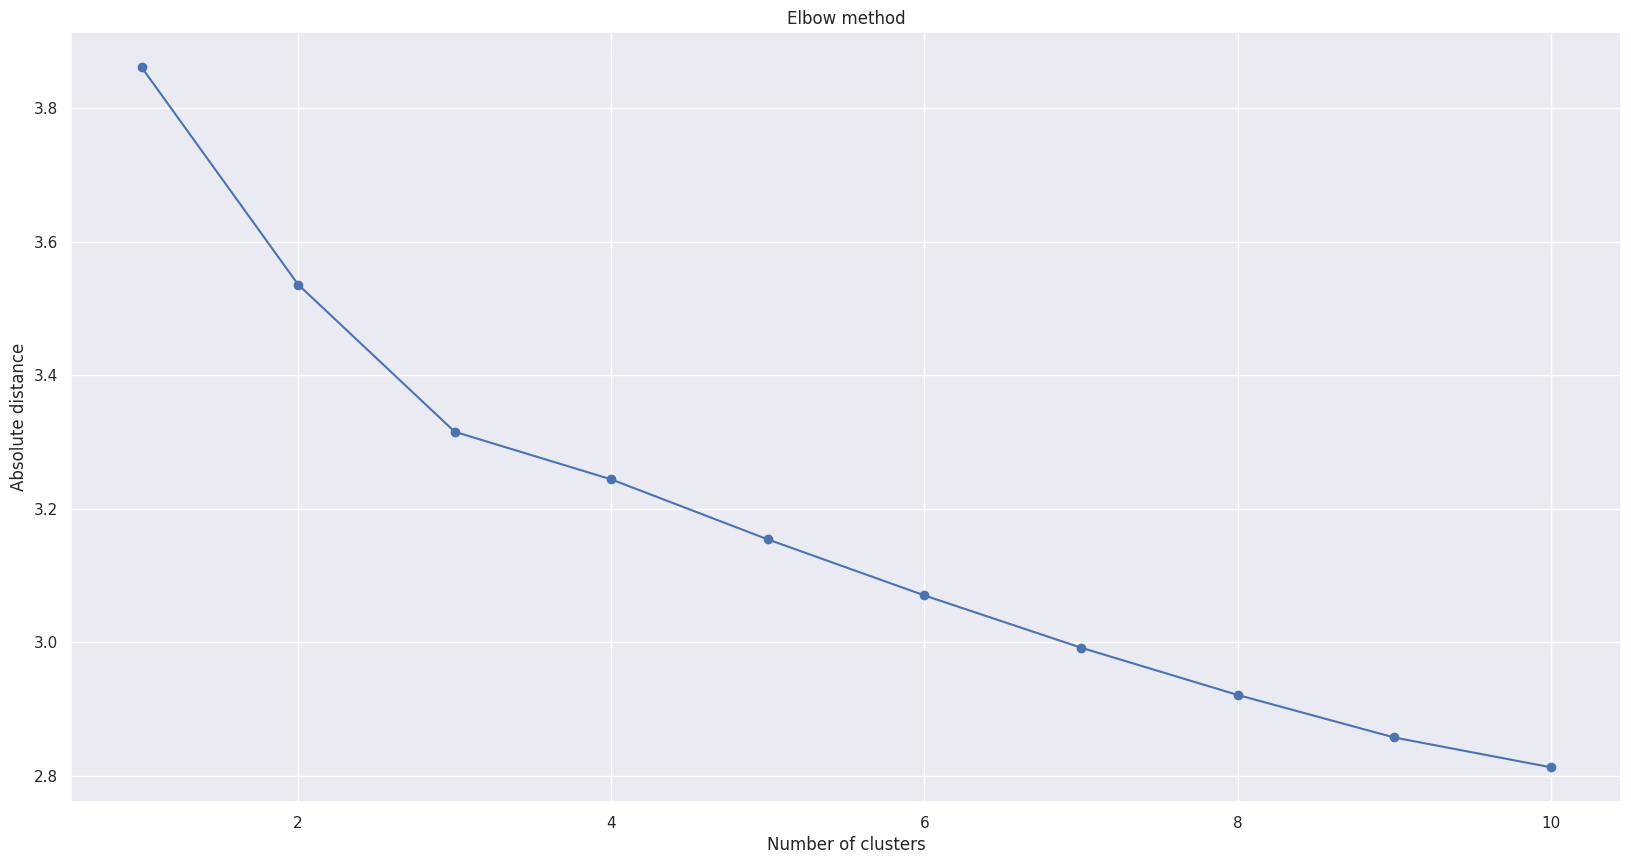

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Select the columns to be used for clustering
cols_to_cluster = ["R", "F", "M"]

# Set the maximum number of clusters to try
max_clusters = 10

# Create an empty list to store the absolute distance
abs_dist = []

# Loop over the range of number of clusters
for i in range(1, max_clusters+1):
    # Create a KMeans object with i clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000)

    # Fit the KMeans object to the scaled data
    kmeans.fit(X)

    # Append the absolute distance to the list
    abs_dist.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the absolute distance for each number of clusters
plt.plot(range(1, max_clusters+1), abs_dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Absolute distance')
plt.title('Elbow method')
plt.show()

In [218]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X)
X['Cluster']=label

print(label)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 2 1 ... 3 3 3]


In [219]:
train.columns
train['Cluster']=label
train.head()

,CustomerID,City,Registration_day,Registration_month,Registration_year,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,...,LastEmail_day,LastEmail_month,FT_day,FT_month,LT_day,LT_month,Num_Transactions,Totalorders,RetentionPotential,Cluster
0,C16368,2,4,9,2012,0,0,0,Monday,CustomizedEmail,...,3,7,6,8,6,8,1,15,High,1
1,C20345,2,6,12,2010,1,1,1,Friday,CustomizedEmail,...,3,12,4,4,6,1,186,15614,Low,2
2,C17683,2,6,10,2010,0,0,0,Wednesday,WelcomeEmail,...,6,10,2,12,2,7,13,443,Medium,1
3,C18647,4,5,11,2010,0,0,0,Monday,CustomizedEmail,...,0,12,0,11,0,1,7,748,Low,0
4,C36692,2,4,12,2009,1,1,0,Friday,CustomizedEmail,...,3,1,2,9,3,1,34,2350,Low,3


<Figure size 700x700 with 0 Axes>

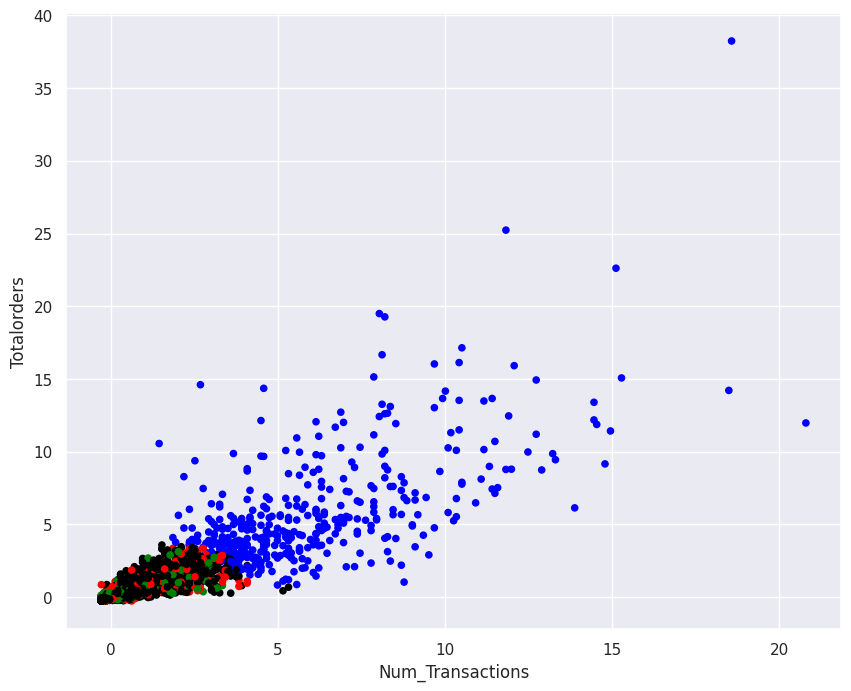

In [224]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
X['Color'] = X['Cluster'].map(lambda p: Colors[p])
ax = X.plot(    
    kind="scatter", 
    x="Num_Transactions", y="Totalorders",
    figsize=(10,8),
    c = X['Color'])